In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Business Objective:

Generate the features from the dataset and use them to recommend the

books accordingly to the users.

In [2]:
bk = pd.read_csv("/content/Books.csv", sep=",",error_bad_lines=False)
rt = pd.read_csv("/content/Ratings.csv")
user = pd.read_csv("/content/Users.csv")

In [3]:
bk.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rt.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Dimension of dataset

In [6]:
bk.shape

(117286, 8)

In [7]:
rt.shape

(1149780, 3)

In [8]:
user.shape

(278858, 3)

EDA

In [9]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117286 entries, 0 to 117285
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 117286 non-null  object
 1   Book-Title           117286 non-null  object
 2   Book-Author          117286 non-null  object
 3   Year-Of-Publication  117286 non-null  int64 
 4   Publisher            117286 non-null  object
 5   Image-URL-S          117285 non-null  object
 6   Image-URL-M          117285 non-null  object
 7   Image-URL-L          117285 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.2+ MB


In [10]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
bk.describe()

,Year-Of-Publication
count,117286.000000
mean,1958.832273
std,263.320642
min,0.000000
25%,1990.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


In [13]:
rt.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [14]:
user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [15]:
bk.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [16]:
rt.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [17]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

From user dataset age column is having maximum missing values

In [18]:
bk.duplicated().sum()

0

In [19]:
rt.duplicated().sum()

0

In [20]:
user.duplicated().sum()

0

No duplicate values in three datasets

# Data cleaning

Book dataset

In [21]:
# nan values in particular column
bk.loc[(bk['Book-Author'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


here Book-Author is with nan/missing value

In [22]:
# nan values from Publisher column
bk.loc[(bk['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Here Publisher is with nan/missing values

In [23]:
# getting unique value from 'year_of_publication' feature
bk['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038])

In [24]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
bk[bk['Year-Of-Publication'] == 0]
#bk[bk['Year-Of-Publication'] == 'nan']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
117211,8807016028,Saltatempo,Benni,0,Feltrinelli,http://images.amazon.com/images/P/8807016028.0...,http://images.amazon.com/images/P/8807016028.0...,http://images.amazon.com/images/P/8807016028.0...
117223,2070334643,Le Pays Ou L'on N'arrive Jamais,Dhotel,0,Livre de Poche,http://images.amazon.com/images/P/2070334643.0...,http://images.amazon.com/images/P/2070334643.0...,http://images.amazon.com/images/P/2070334643.0...
117229,2070378314,Le Livre Du Rire Et De Loubli,Milan Kundera,0,Gallimard French,http://images.amazon.com/images/P/2070378314.0...,http://images.amazon.com/images/P/2070378314.0...,http://images.amazon.com/images/P/2070378314.0...
117234,8817167770,Guardia Bianca,Michail Bulgakov,0,Biblioteca Universale Rizzoli,http://images.amazon.com/images/P/8817167770.0...,http://images.amazon.com/images/P/8817167770.0...,http://images.amazon.com/images/P/8817167770.0...


4618 rows with zero values as year of publication


 Extracting and fixing mismatch in feature year-of-publication column

In [25]:
# Replace 'Year-Of-Publication' values equal to 0 with a new value (e.g., 2023)
new_value = 2023
bk.loc[bk['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = new_value


In [26]:
print(bk['Year-Of-Publication']==0)  # Here fixed year-of-publication with new value

0         False
1         False
2         False
3         False
4         False
          ...  
117281    False
117282    False
117283    False
117284    False
117285    False
Name: Year-Of-Publication, Length: 117286, dtype: bool


In [27]:
# Check for NaN values in the 'Year-Of-Publication' column
is_nan = pd.isna(bk['Year-Of-Publication'])
print(is_nan)

0         False
1         False
2         False
3         False
4         False
          ...  
117281    False
117282    False
117283    False
117284    False
117285    False
Name: Year-Of-Publication, Length: 117286, dtype: bool


Extracting and fixing mismatch in feature

There has to make some correction in three rows as you can see in above output.

In [28]:
bk.index

RangeIndex(start=0, stop=117286, step=1)

In [29]:
#bk.loc[221678]

In [30]:
#bk.loc[209538]

In [31]:
#bk.loc[220731]

Let's fix it and make it in correct format as per our dataset.

In [32]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [33]:
replace_df_value(bk, 209538, 'Book-Title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(bk, 209538, 'Book-Author', 'Michael Teitelbaum')
replace_df_value(bk, 209538, 'Year-Of-Publication', 2000)
replace_df_value(bk, 209538, 'Publisher', 'DK Publishing Inc')

replace_df_value(bk, 221678, 'Book-Title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(bk, 221678, 'Book-Author', 'James Buckley')
replace_df_value(bk, 221678, 'Year-Of-Publication', 2000)
replace_df_value(bk, 221678, 'Publisher', 'DK Publishing Inc')

replace_df_value(bk, 220731,'Book-Title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(bk, 220731, 'Book-Author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(bk, 220731, 'Year-Of-Publication', 2003)
replace_df_value(bk, 220731, 'Publisher', 'Gallimard')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
117284,0201710919,Planning Extreme Programming,Kent Beck,2000.0,Addison-Wesley Professional,http://images.amazon.com/images/P/0201710919.0...,http://images.amazon.com/images/P/0201710919.0...,http://images.amazon.com/images/P/0201710919.0...
117285,0330350196,The Lexicon,Ngaire E. Genge,1997.0,Pan,NaN,NaN,NaN
209538,NaN,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000.0,DK Publishing Inc,NaN,NaN,NaN
221678,NaN,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000.0,DK Publishing Inc,NaN,NaN,NaN


In [34]:
bk.loc[221678]

ISBN                                                                 NaN
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                               2000.0
Publisher                                              DK Publishing Inc
Image-URL-S                                                          NaN
Image-URL-M                                                          NaN
Image-URL-L                                                          NaN
Name: 221678, dtype: object

In [35]:
bk.loc[209538]

ISBN                                                                 NaN
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                               2000.0
Publisher                                              DK Publishing Inc
Image-URL-S                                                          NaN
Image-URL-M                                                          NaN
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [36]:
bk.loc[220731]

ISBN                                                     NaN
Book-Title             Peuple du ciel, suivi de 'Les Bergers
Book-Author                  Jean-Marie Gustave Le ClÃ?Â©zio
Year-Of-Publication                                   2003.0
Publisher                                          Gallimard
Image-URL-S                                              NaN
Image-URL-M                                              NaN
Image-URL-L                                              NaN
Name: 220731, dtype: object

Mismatch is fixed. now we can view perfect matching for their corresponding features.

In [37]:
bk.loc[(bk['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [38]:
# replacing 'Nan' with 'Not Mentioned'
bk.loc[(bk['ISBN'] == '193169656X'),'Publisher'] = 'Not Mentioned'
bk.loc[(bk['ISBN'] == '1931696993'),'Publisher'] = 'Not Mentioned'

In [39]:
bk[bk['Publisher'] == 'Not Mentioned']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


So we have change the publisher's name from 'NaN' to 'Not Mentioned'.

# User dataset

Visualize the missing values from User dataset,Here age column is having maximum missing values

<Axes: >

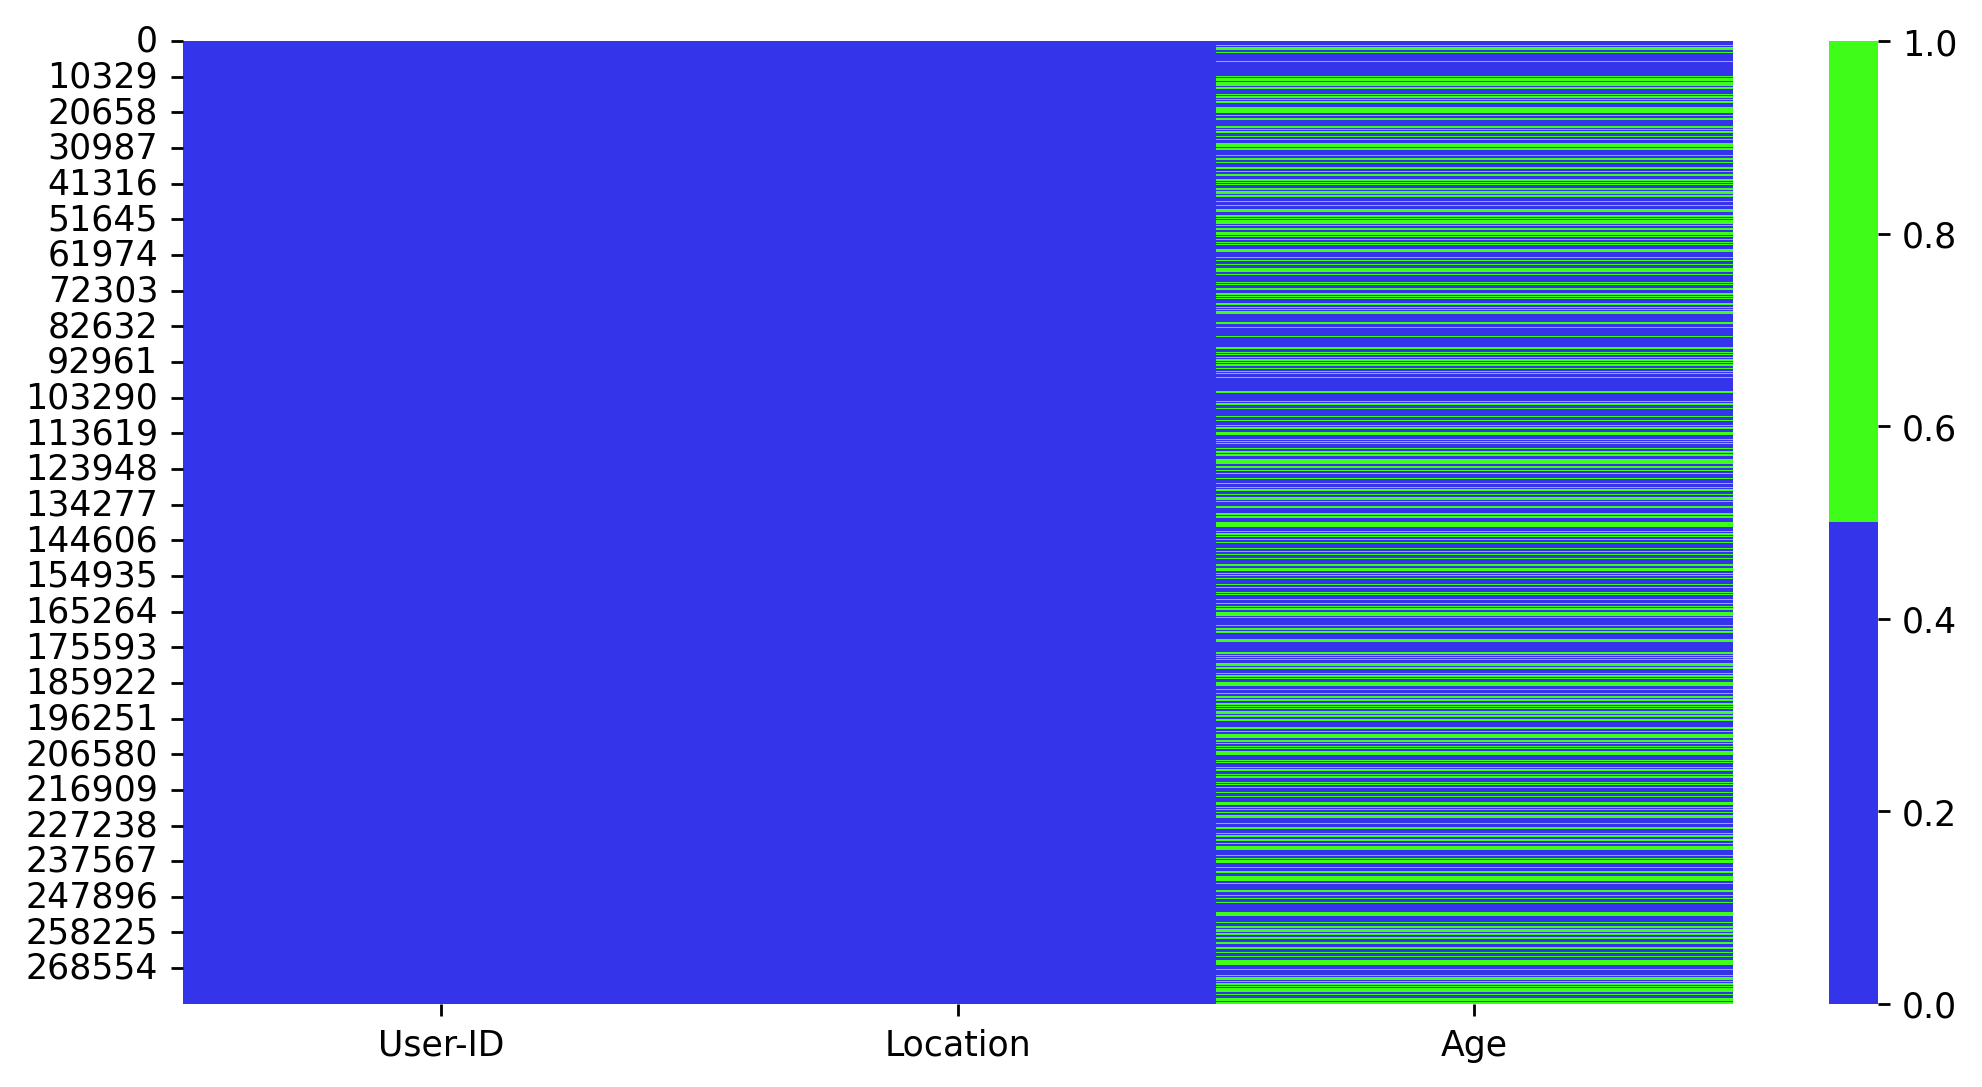

In [40]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

sns.heatmap(user.isna(), cmap=['#3434eb','#3ffc19'])

In [41]:
# unique value in age column
user['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

here we can see NaN values

In [42]:
# replacing nan with average of 'age'
user['Age'].fillna((user['Age'].mean()), inplace=True)

In [43]:
user['Age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

we fix null values for age column with average age.

<Axes: xlabel='Age', ylabel='Density'>

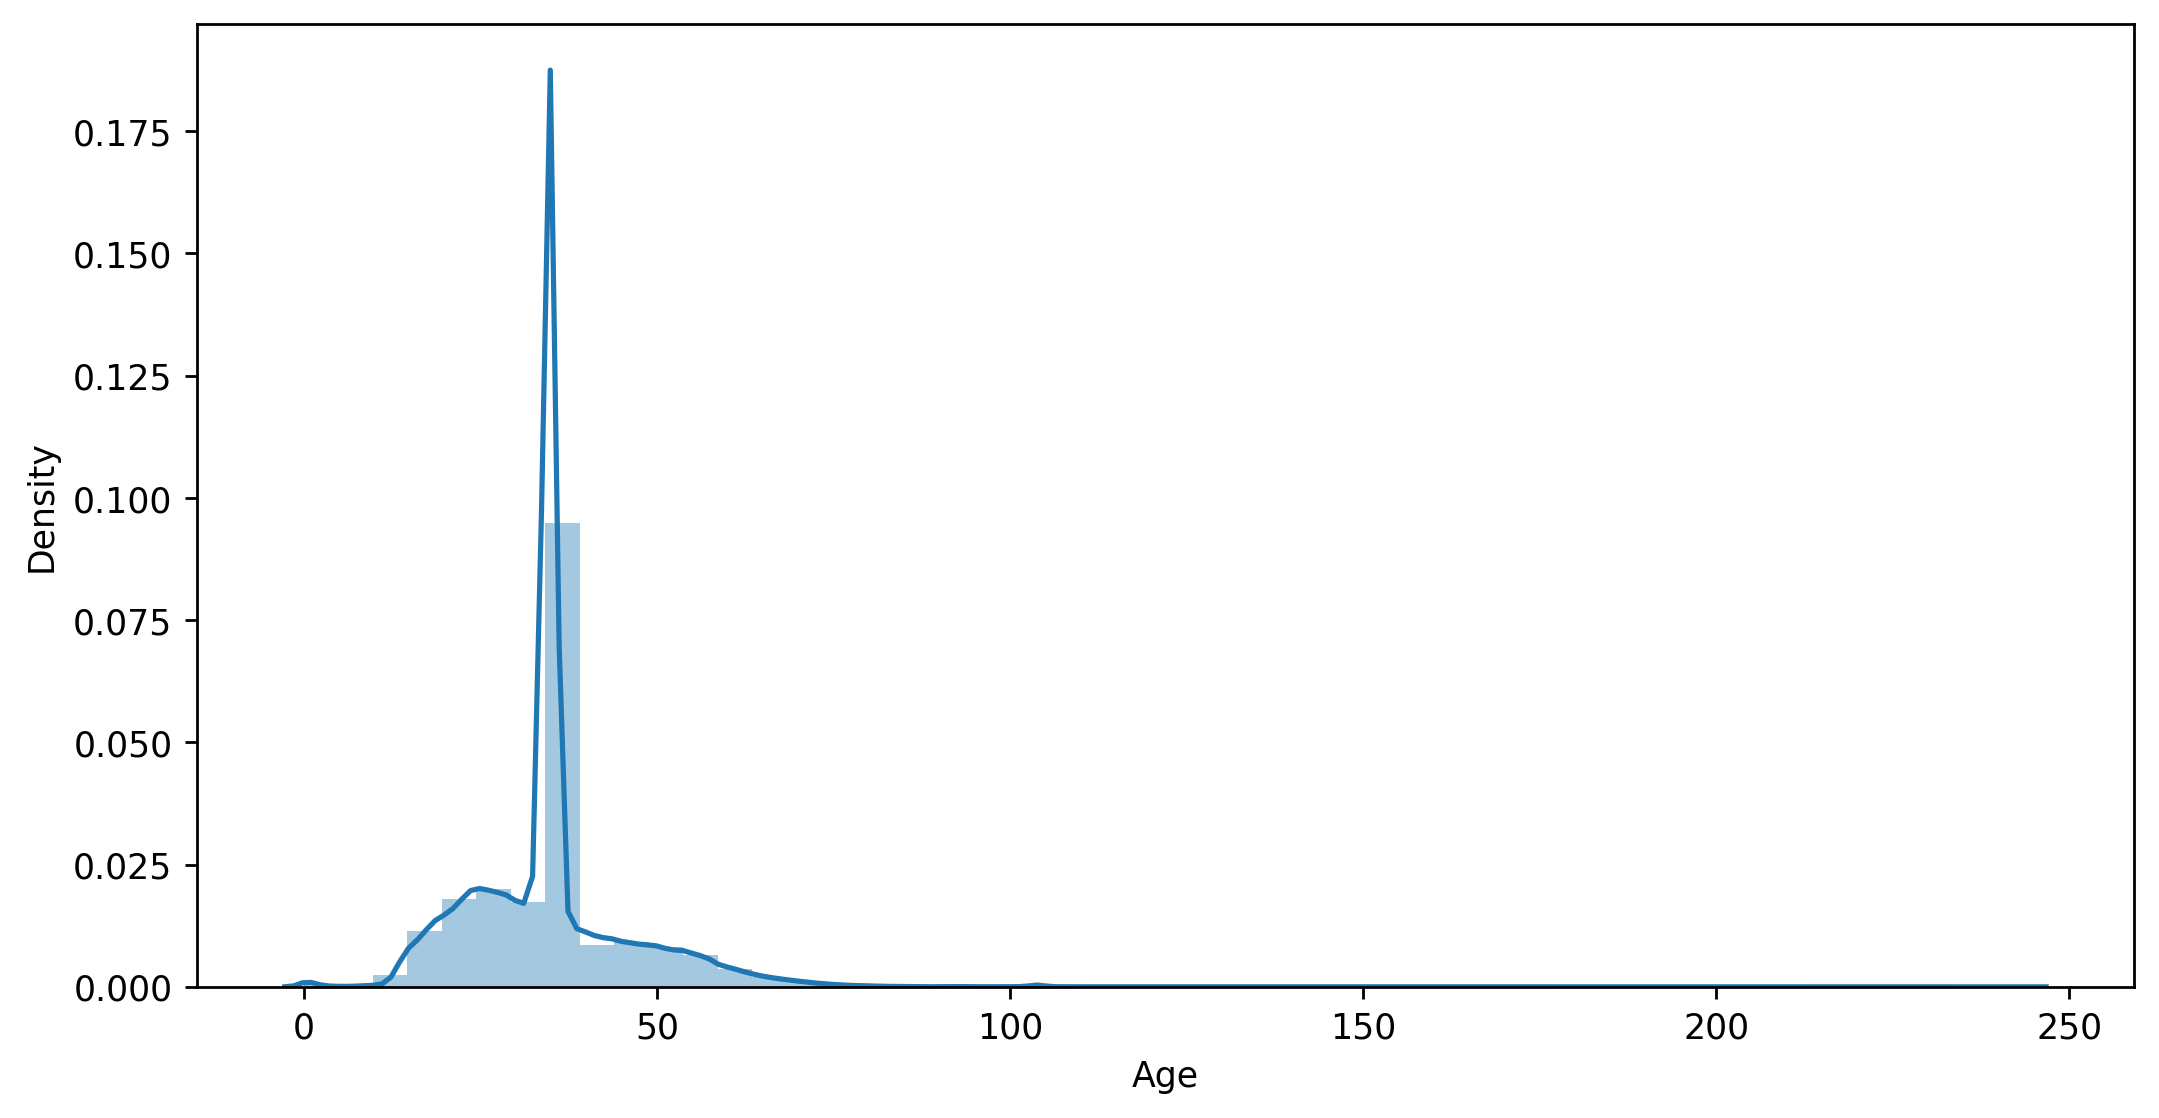

In [44]:
sns.distplot(user['Age'].dropna()) # the distribution is positively skewed (tail to the right)

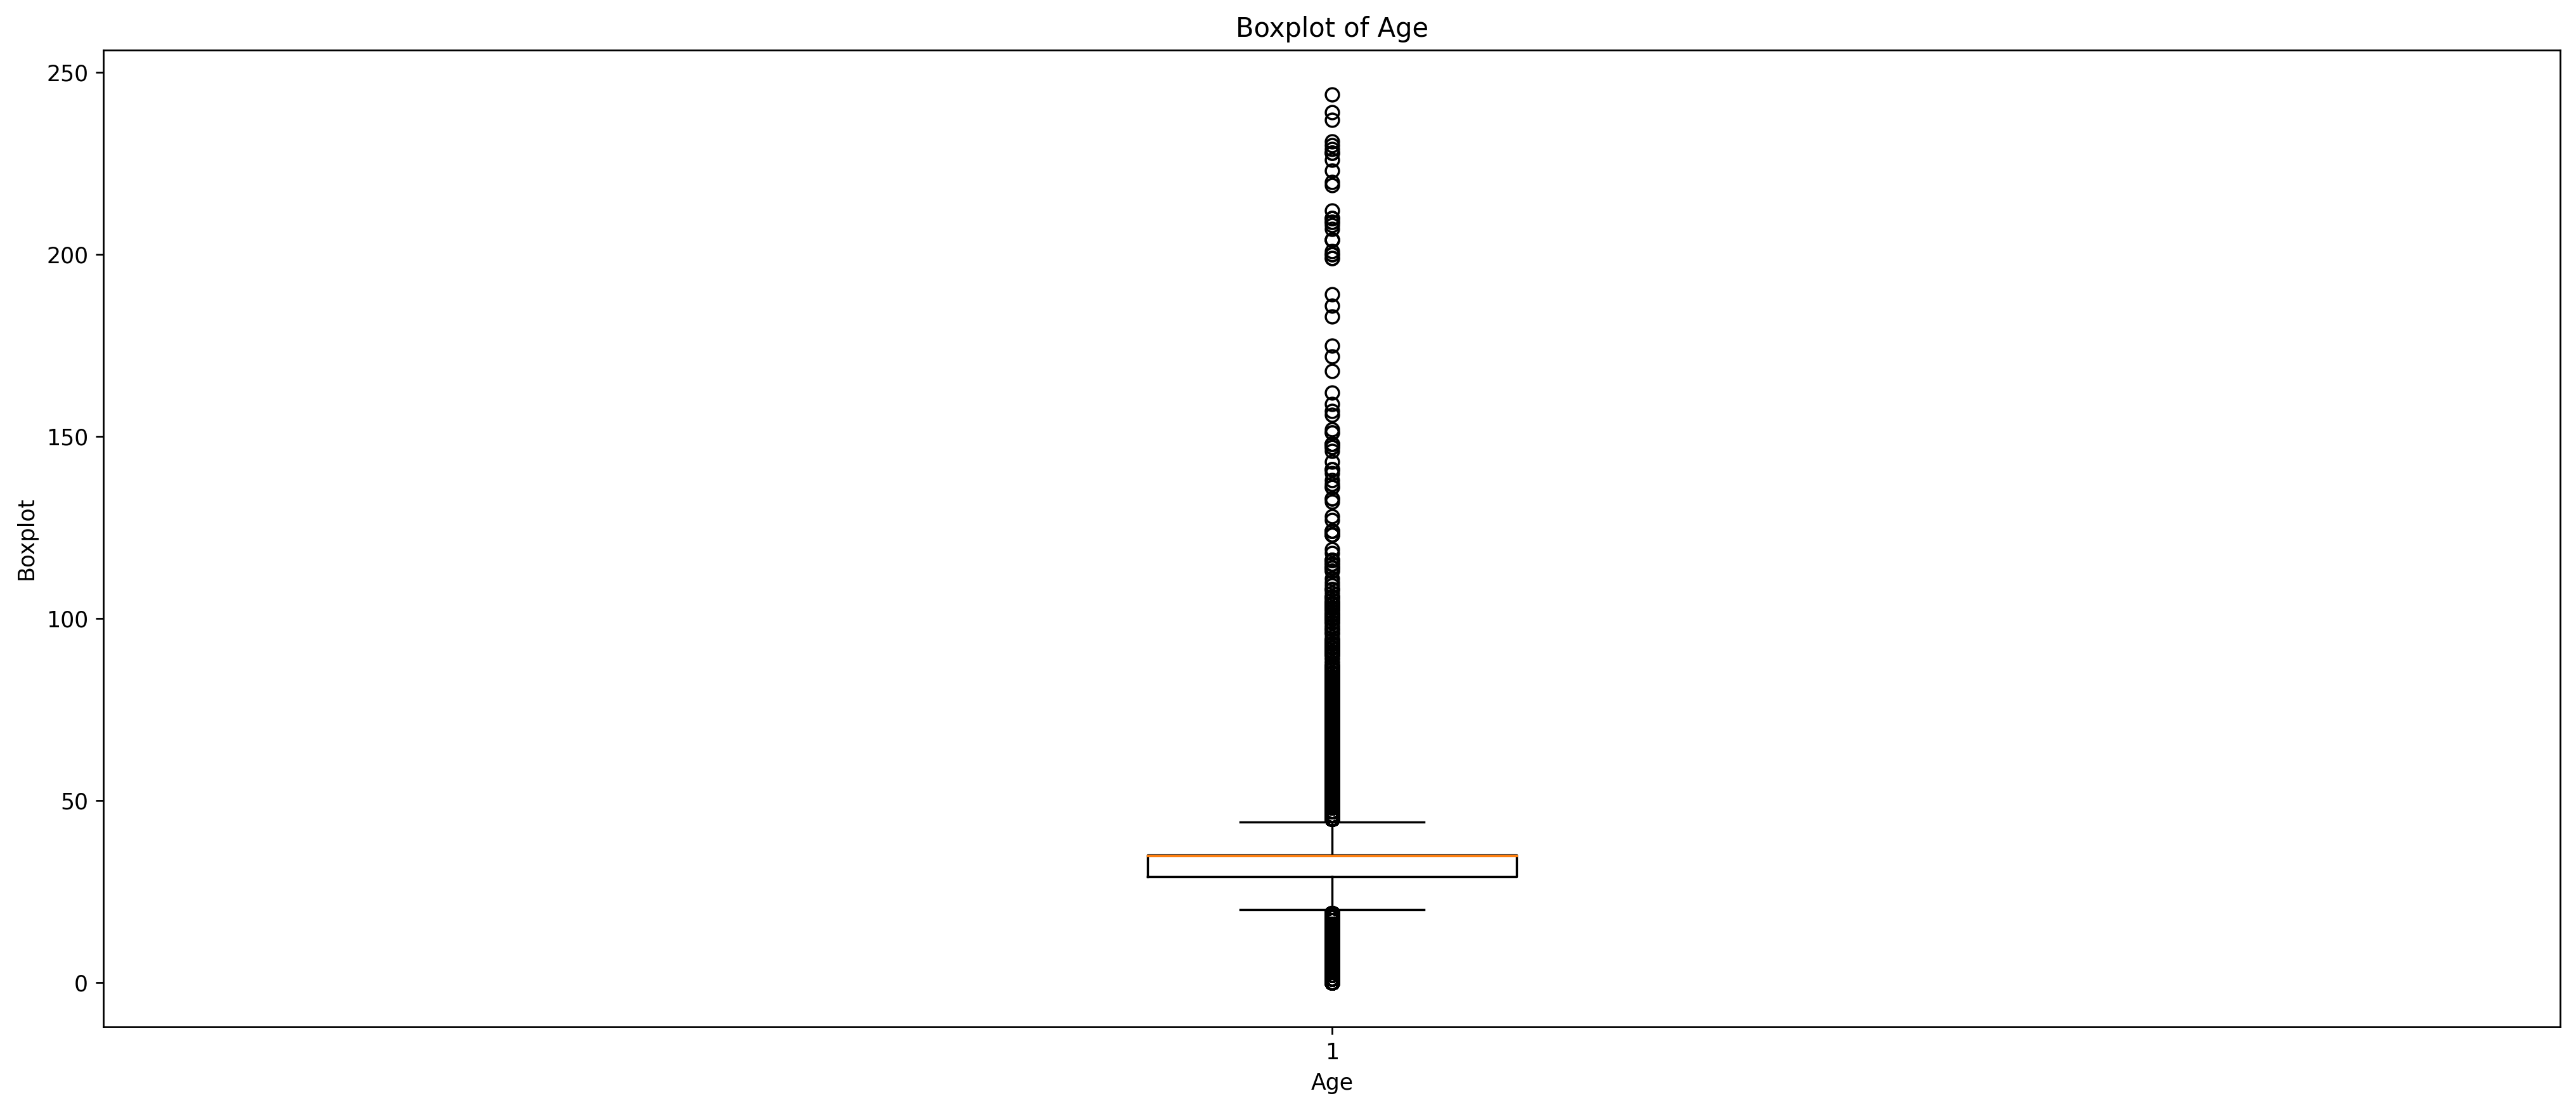

In [45]:
plt.figure(figsize=(20, 8))      # we can see maximum outliers in Age column

plt.boxplot(user['Age'].dropna())  # Drop NaN values before plotting
plt.xlabel('Age')
plt.ylabel('Boxplot')
plt.title('Boxplot of Age')
plt.show()

# Rating dataset

In [46]:
rt.head()        # ISBN column is same from rating and book dataset

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
# finding unique ISBNs from rating and book dataset
unique_ratings = rt[rt.ISBN.isin(bk.ISBN)]
unique_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
8,276744,038550120X,7
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [48]:
print(rt.shape)
print(unique_ratings.shape)

(1149780, 3)
(798979, 3)


In [49]:
# unique ratings from 'book_rating' feature
unique_ratings['Book-Rating'].unique()

array([ 0,  7,  9,  8,  5, 10,  6,  3,  2,  4,  1])

#Data Visualizations

Data visualization using book dataset

<Axes: xlabel='Year-Of-Publication', ylabel='Density'>

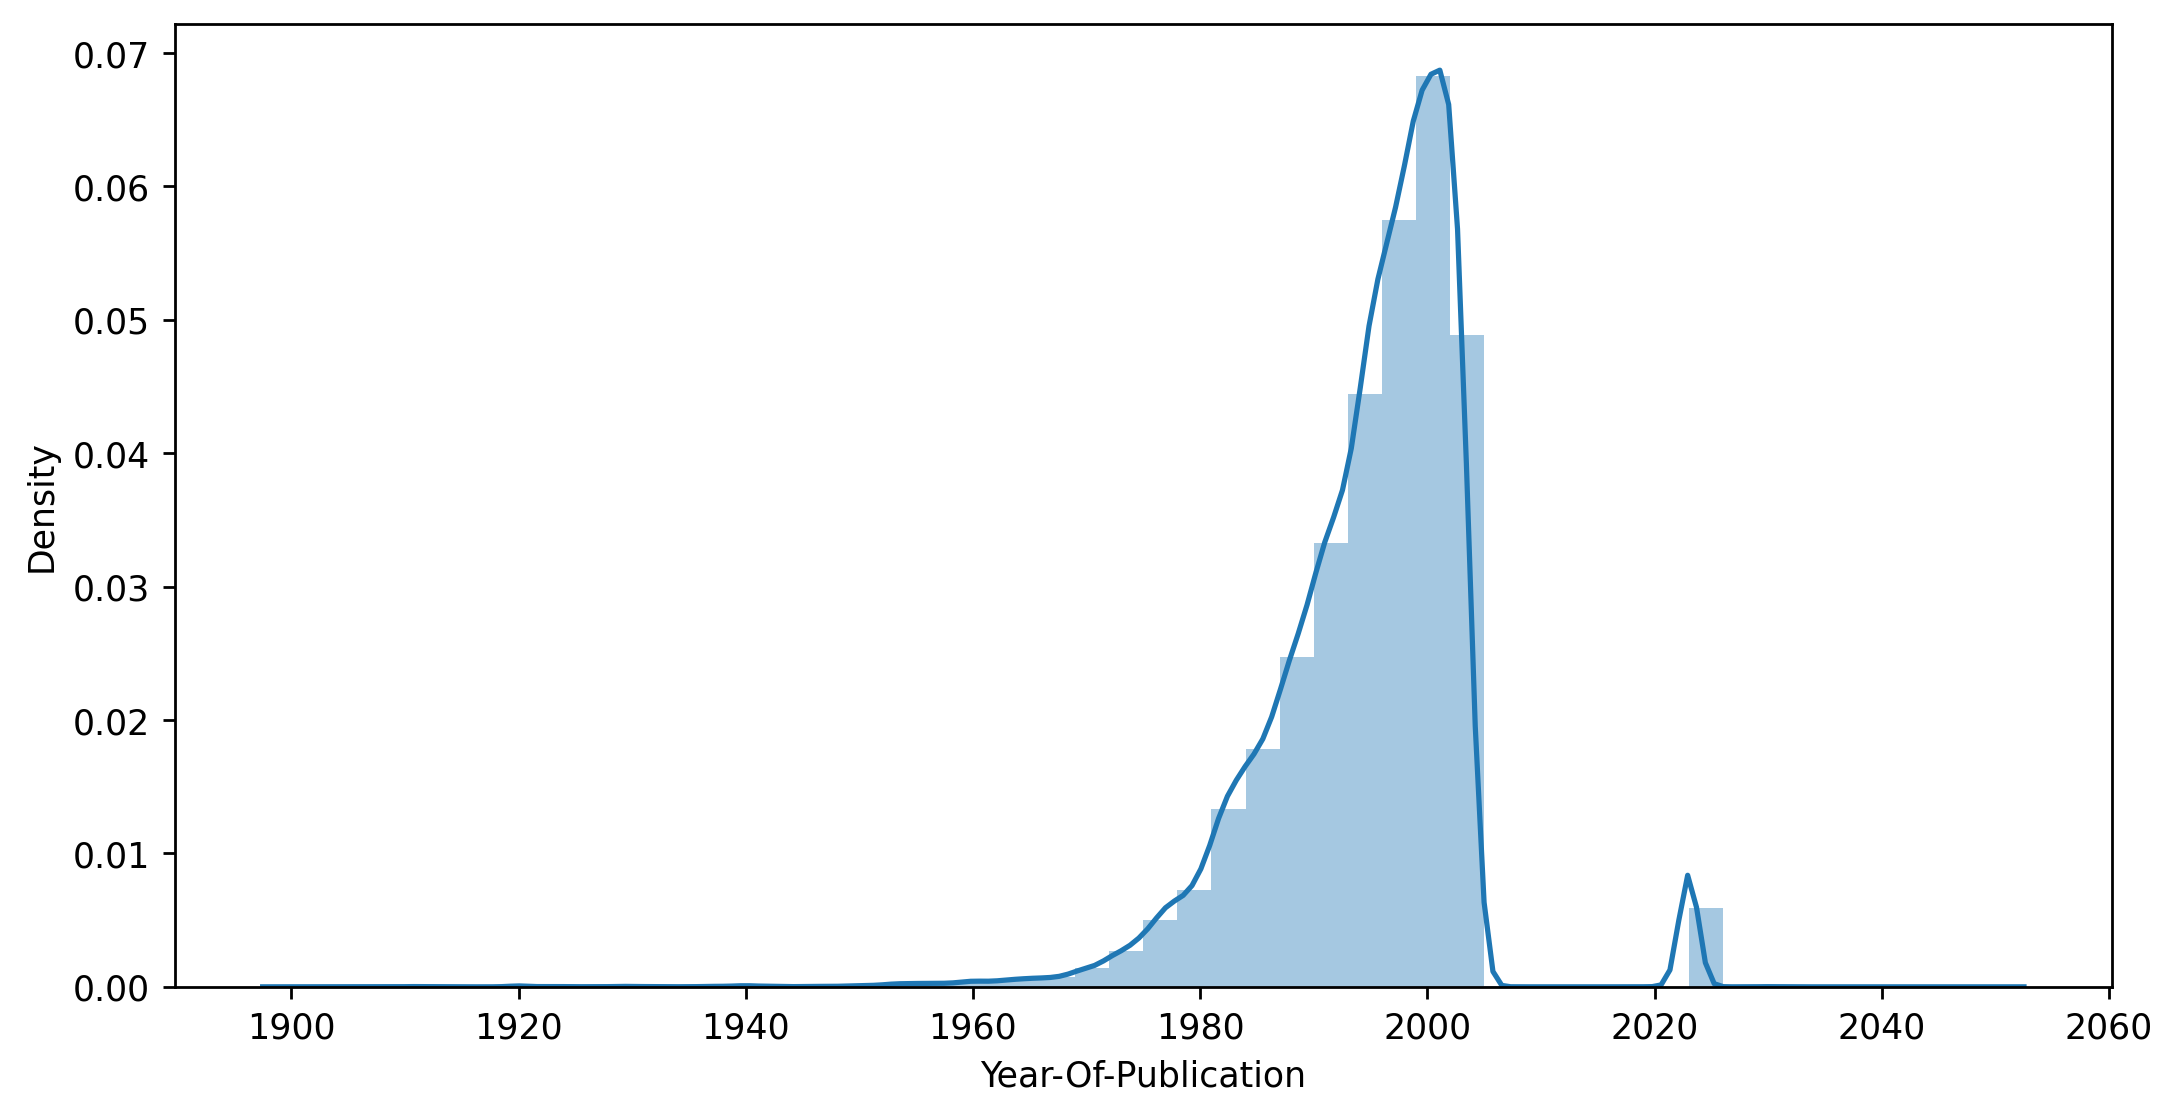

In [50]:
# Replace non-numeric values with NaN
bk['Year-Of-Publication'] = pd.to_numeric(bk['Year-Of-Publication'], errors='coerce')

# Plot the distribution
sns.distplot(bk['Year-Of-Publication'].dropna())  # Drop NaN values before plotting


Distribution of books ratings

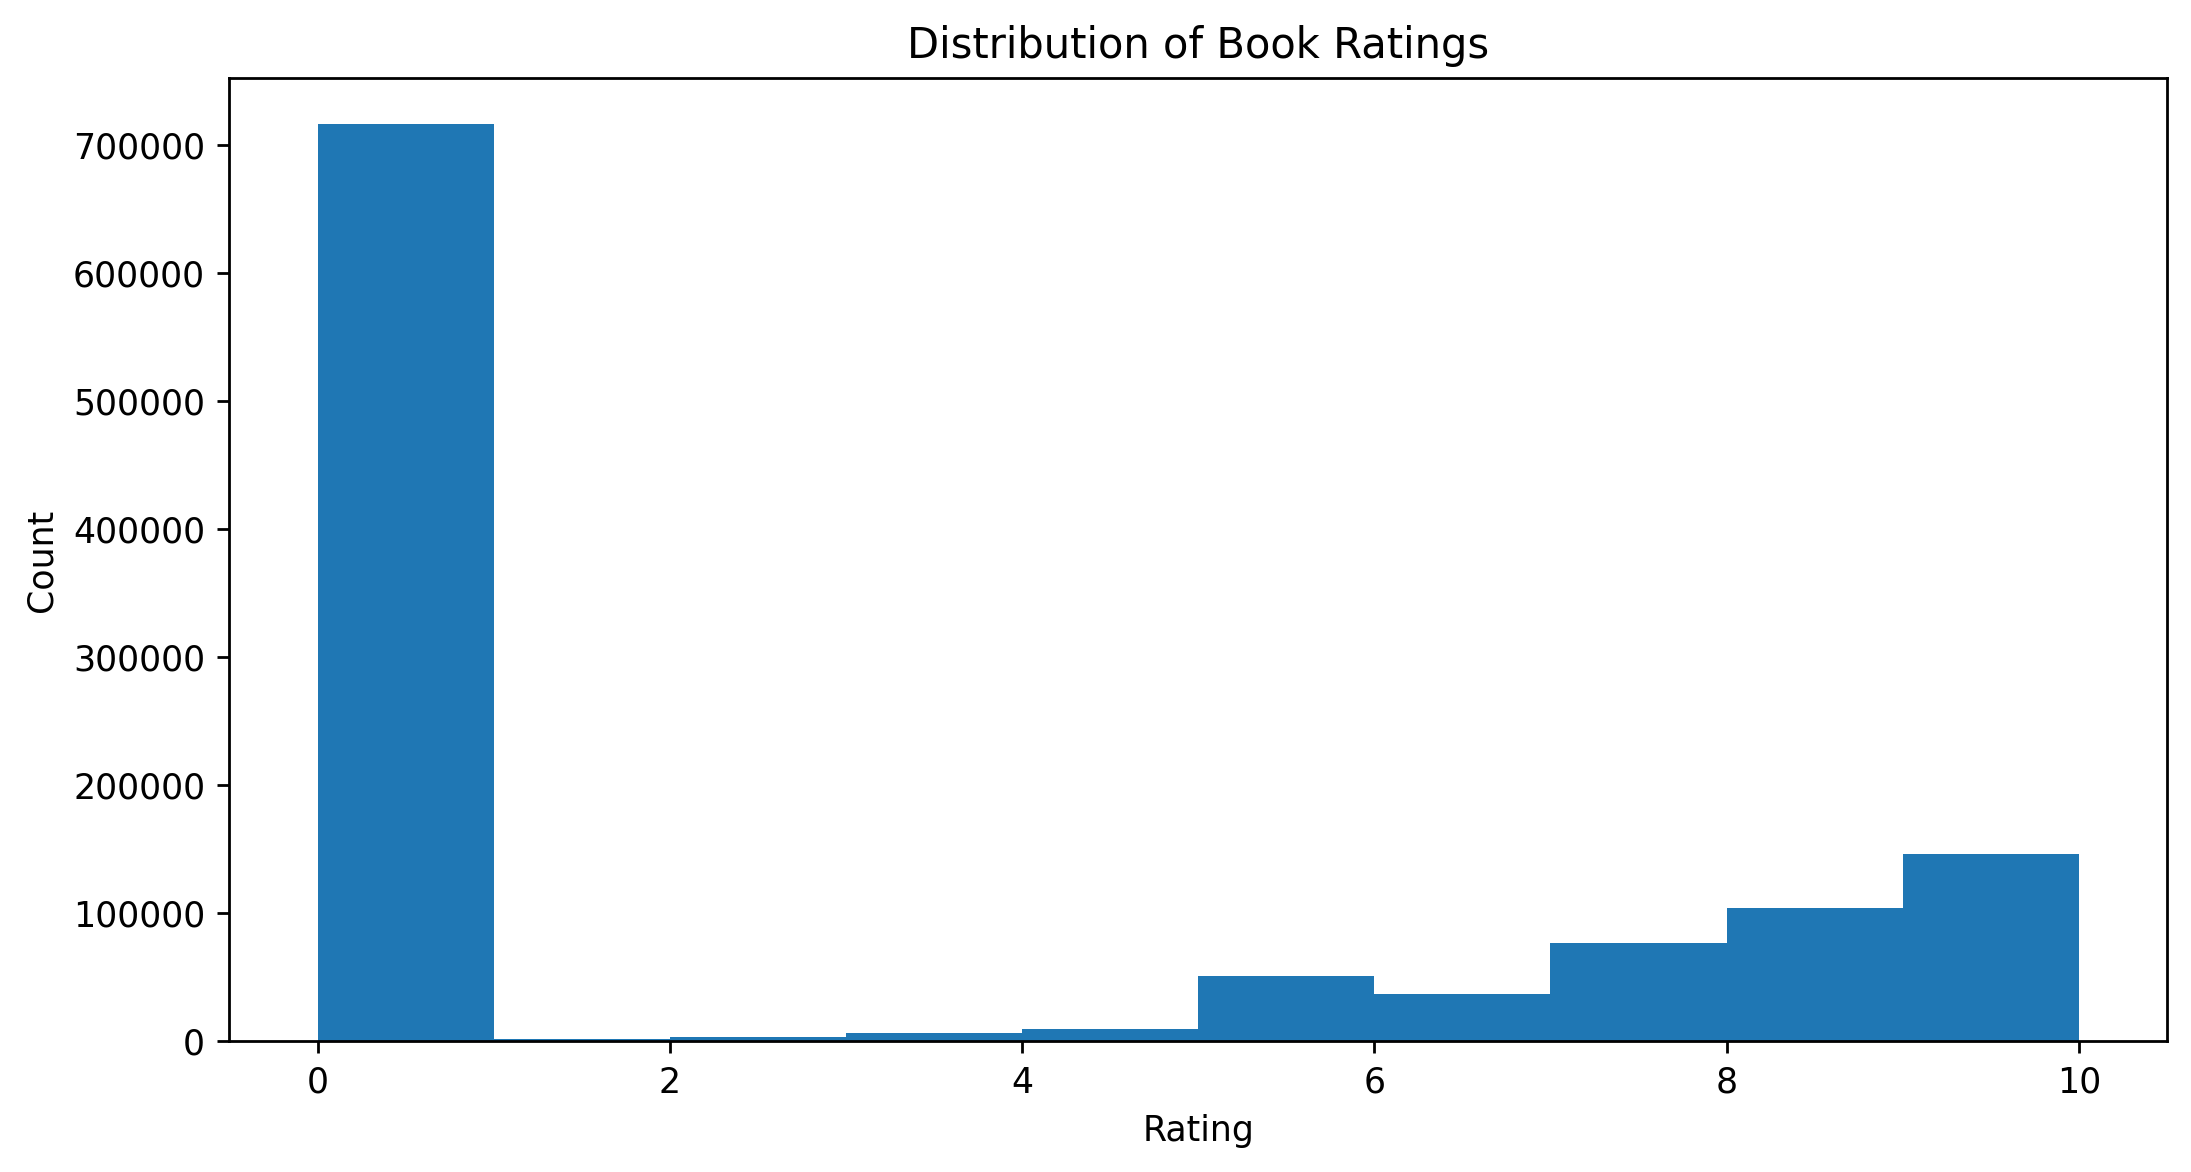

In [51]:
# Plot histogram of book ratings
plt.hist(rt['Book-Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

In [52]:
unique_publishers = bk['Publisher'].unique()  # Get unique publisher values as a NumPy array
count_unique_publishers = len(unique_publishers)  # Count the number of unique publishers

print("Number of unique publishers:", count_unique_publishers)


Number of unique publishers: 8961


Top 10 publishers with the most books

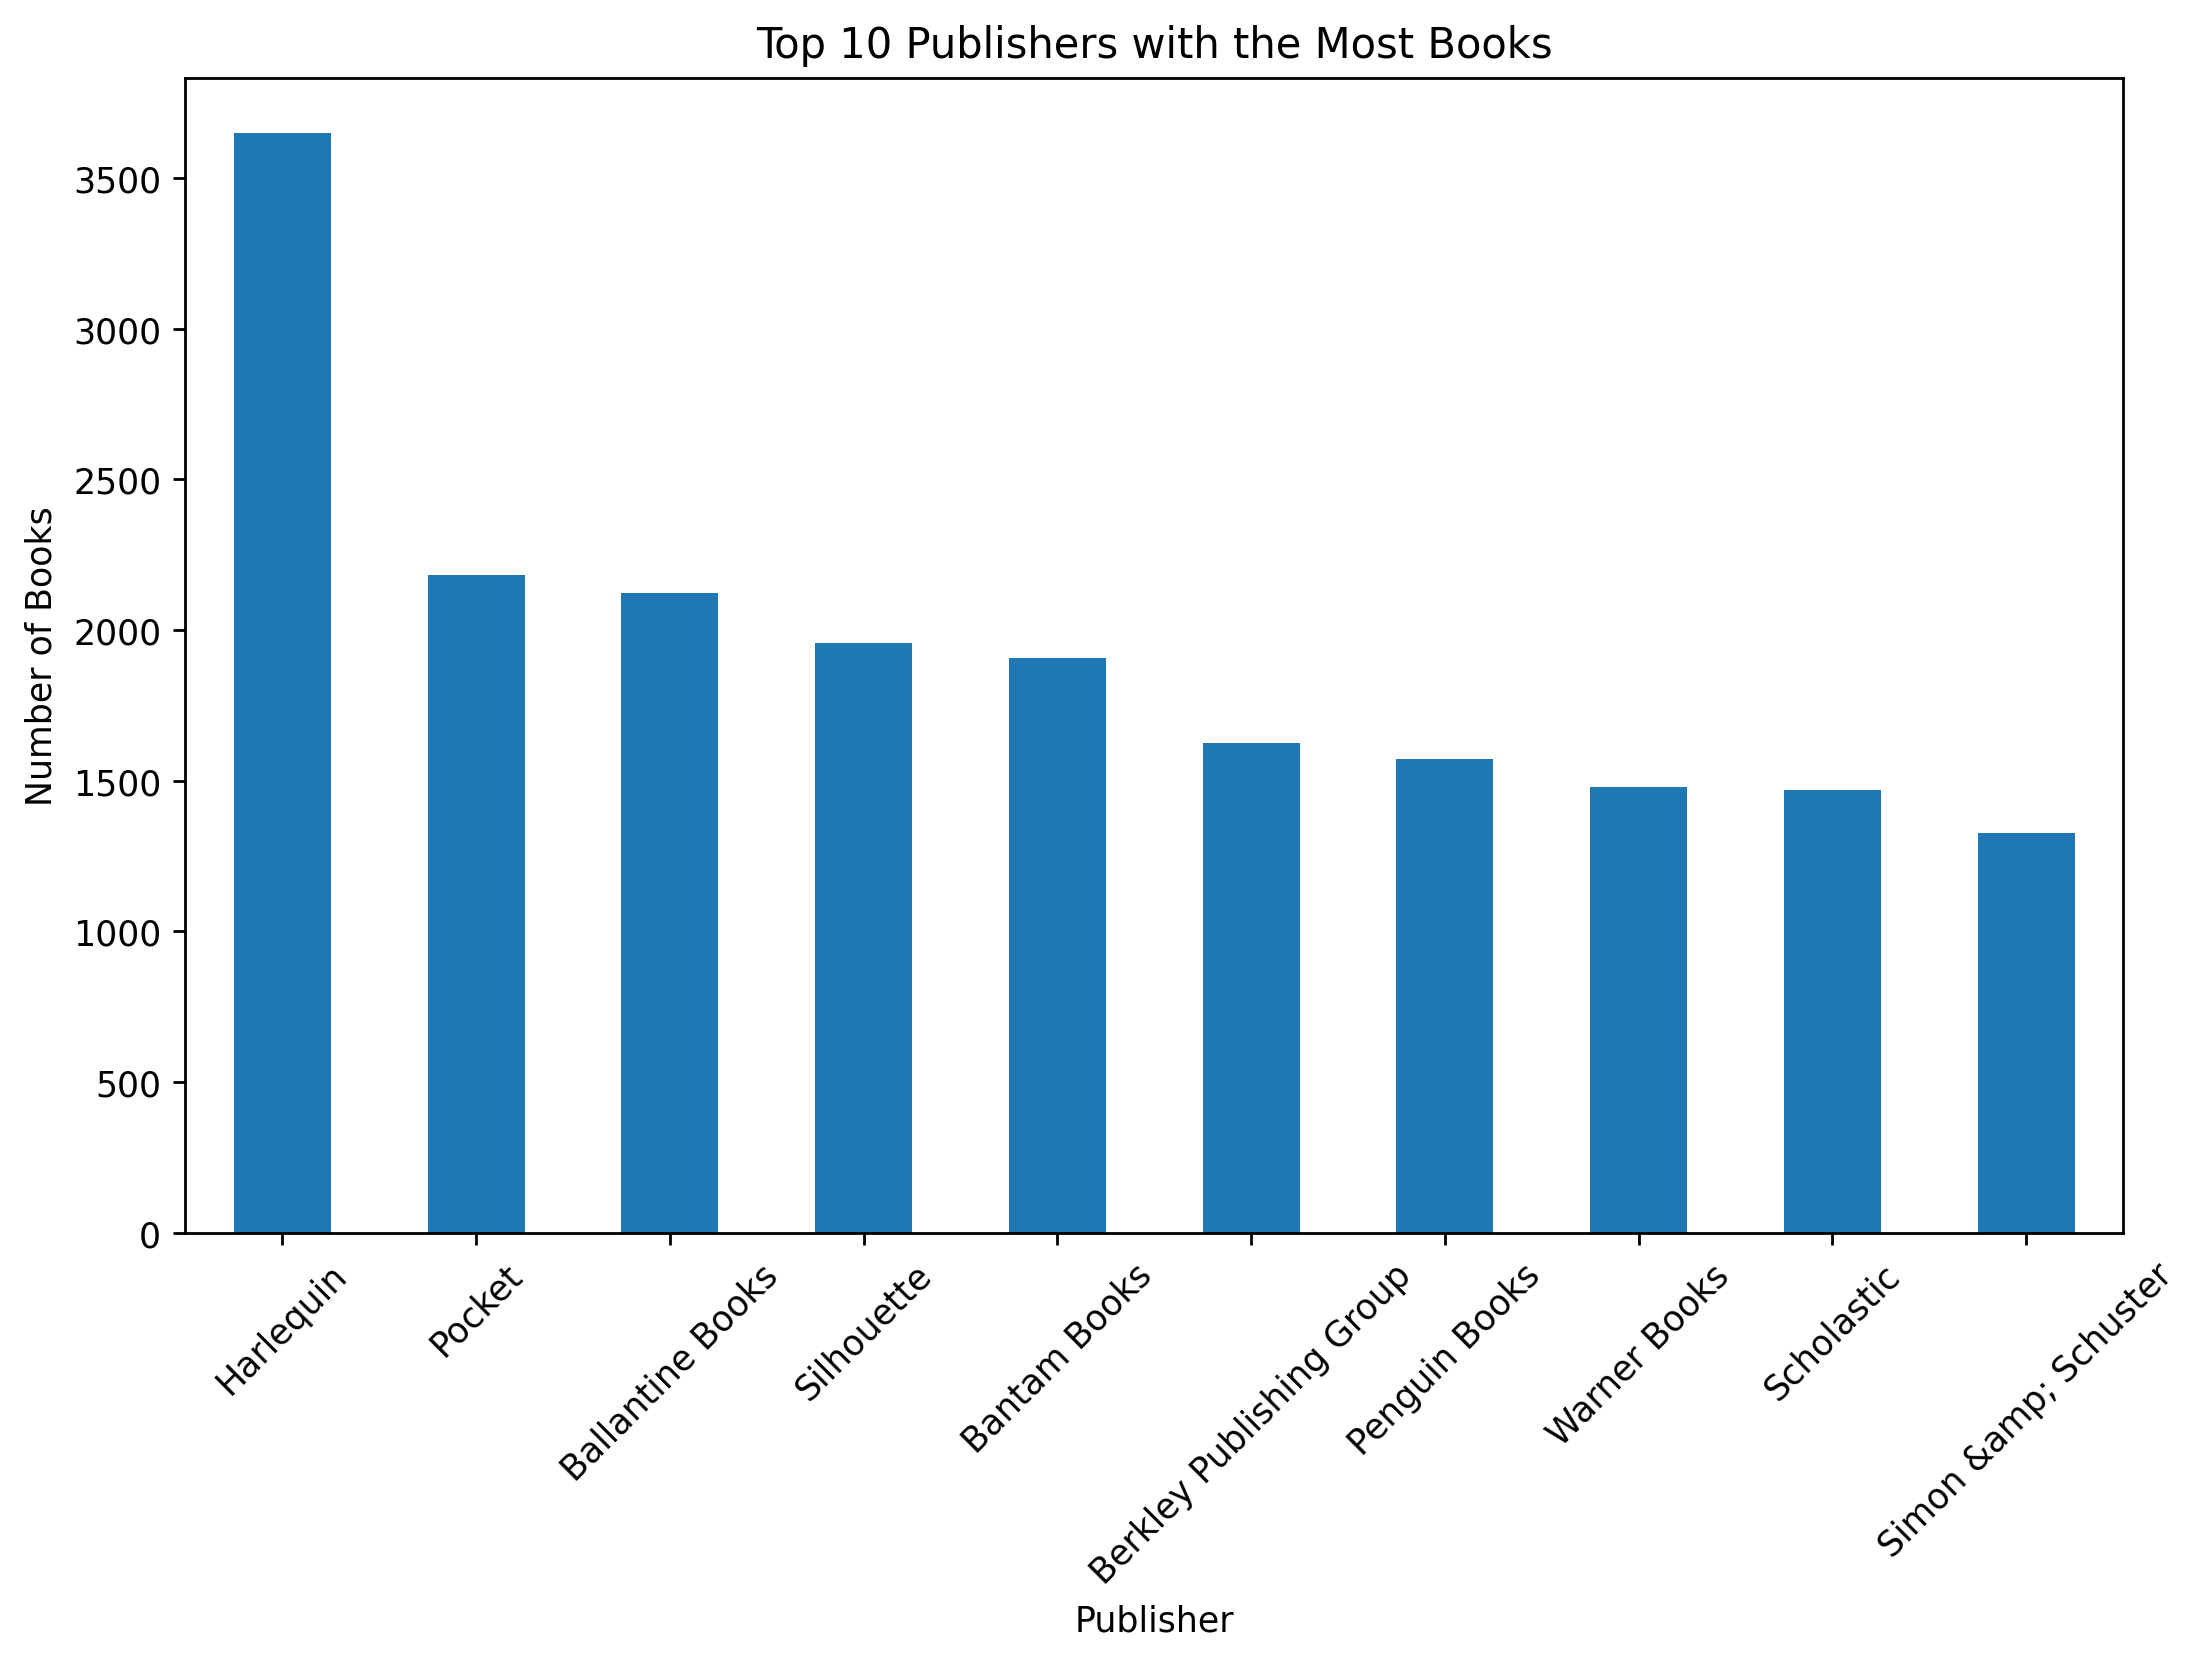

In [53]:
top_publishers = bk['Publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

Top 10 Authors with the most books

In [54]:
unique_author = bk['Book-Author'].unique()  # Get unique author values as a NumPy array
count_unique_author = len(unique_author)  # Count the number of unique author

print("Number of unique Author:", count_unique_author)

Number of unique Author: 48545


Text(0.5, 1.0, 'Top 10 author with number of books')

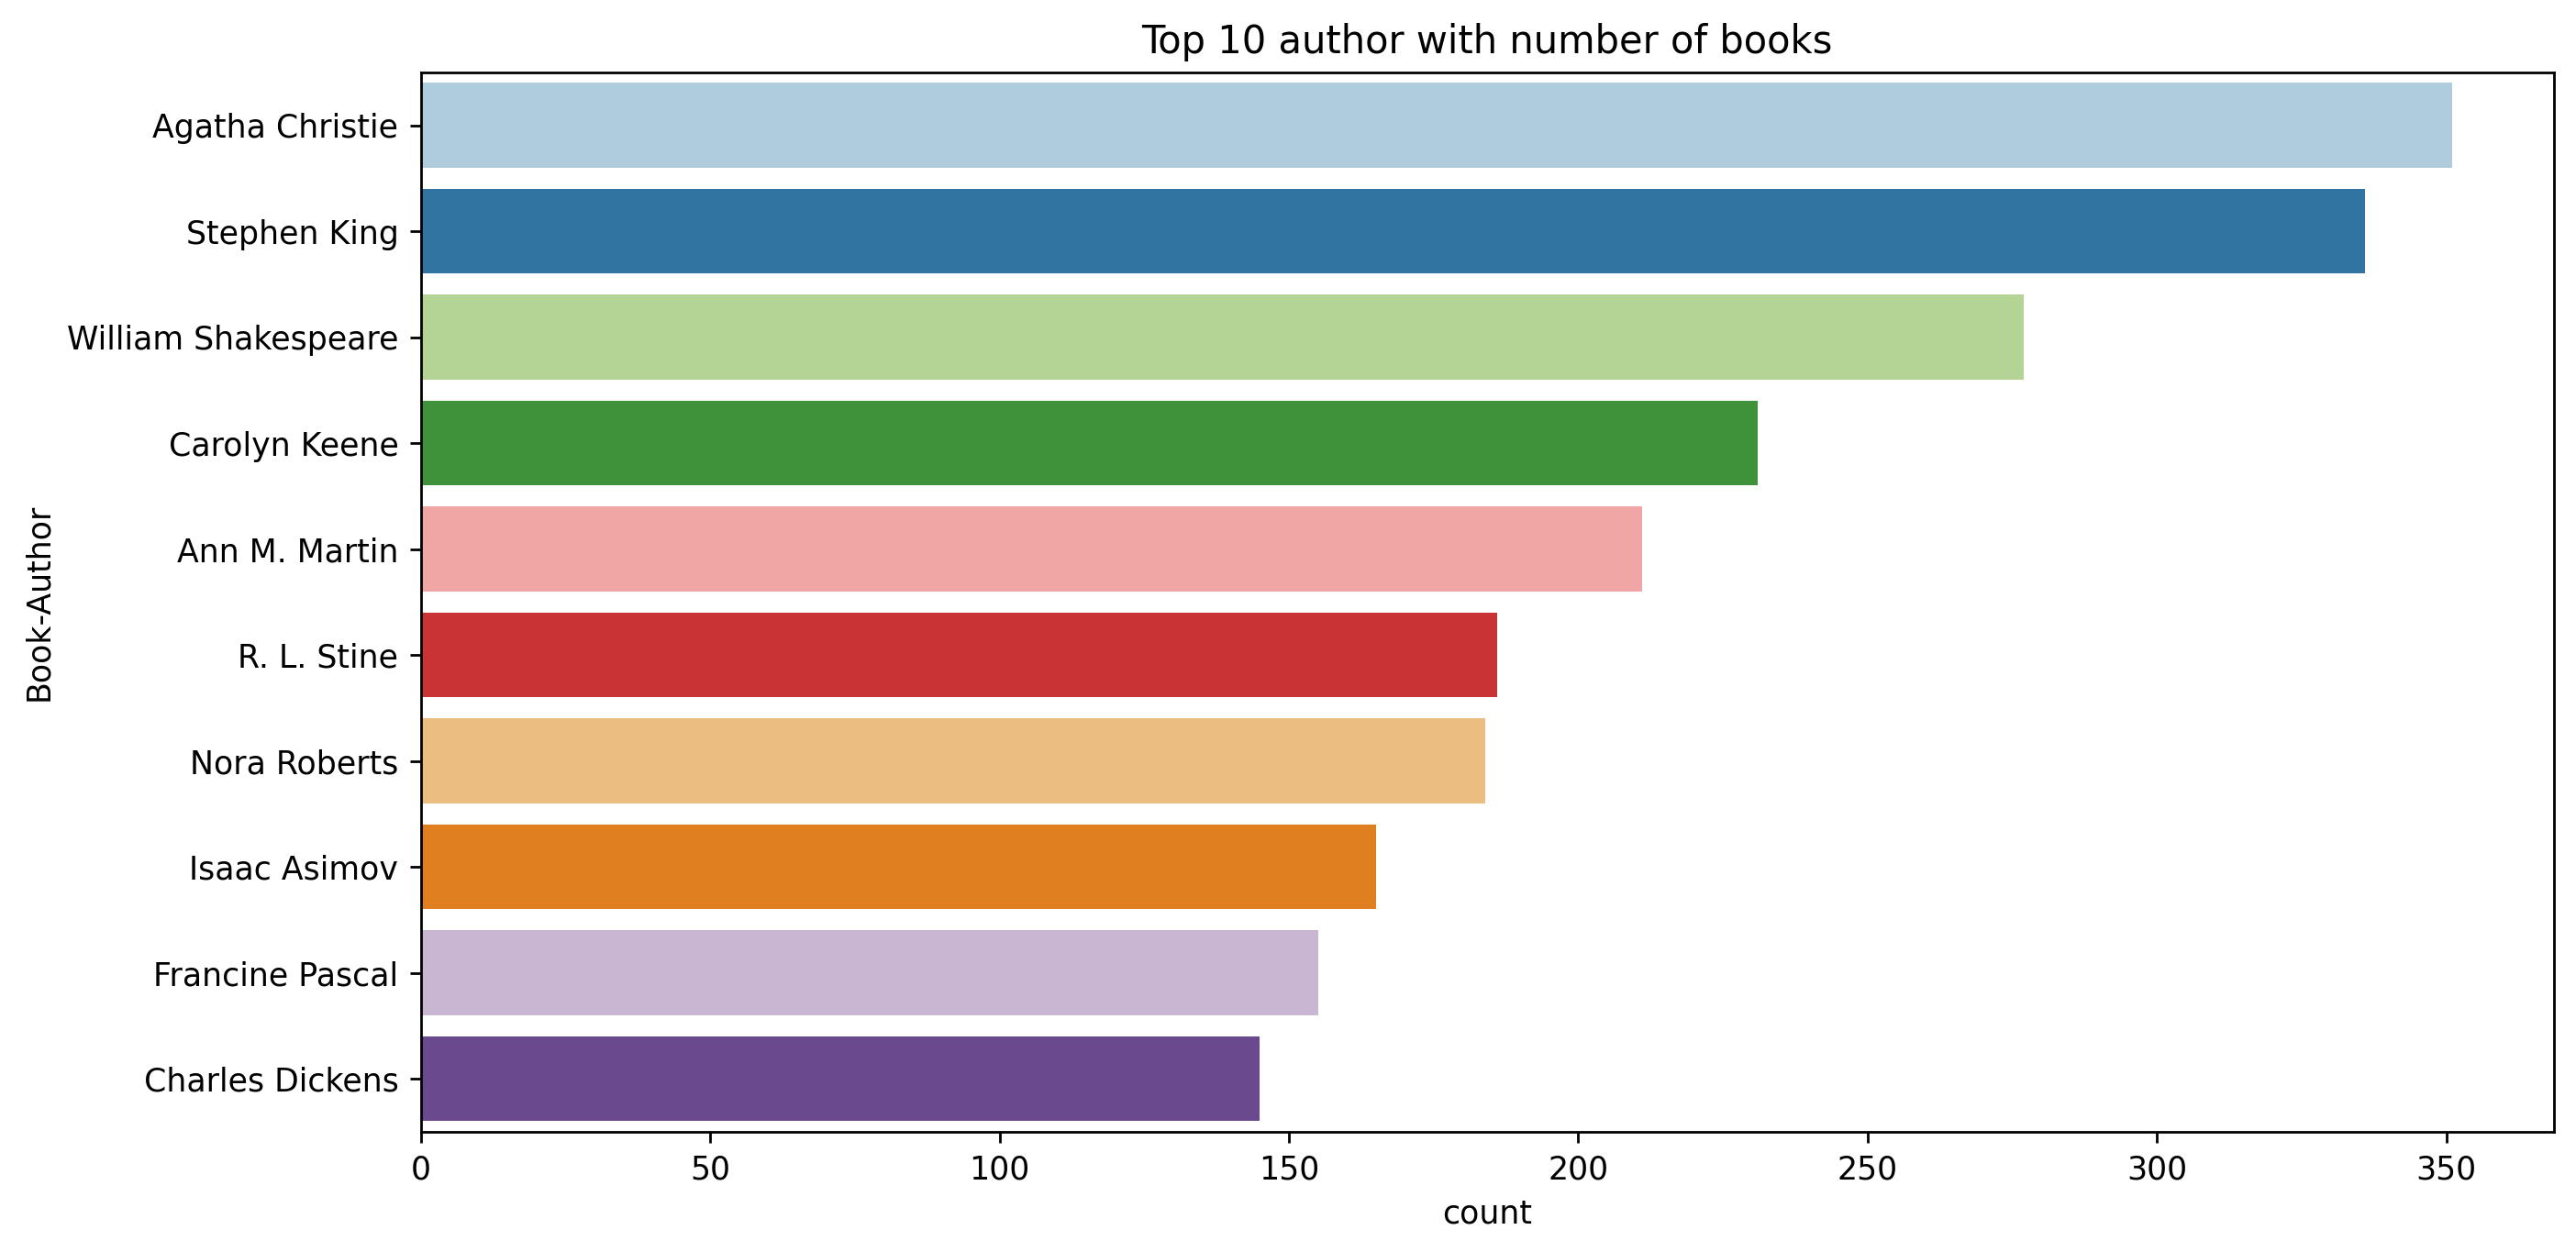

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=bk,order=bk['Book-Author'].value_counts().index[0:10])
plt.title("Top 10 author with number of books")

In [56]:
unique_books = bk['Book-Title'].unique()  # Get unique books values as a NumPy array
count_unique_books = len(unique_books)  # Count the number of unique books

print("Number of unique Books:", count_unique_books)


Number of unique Books: 106337


Top 10 years when most books got published

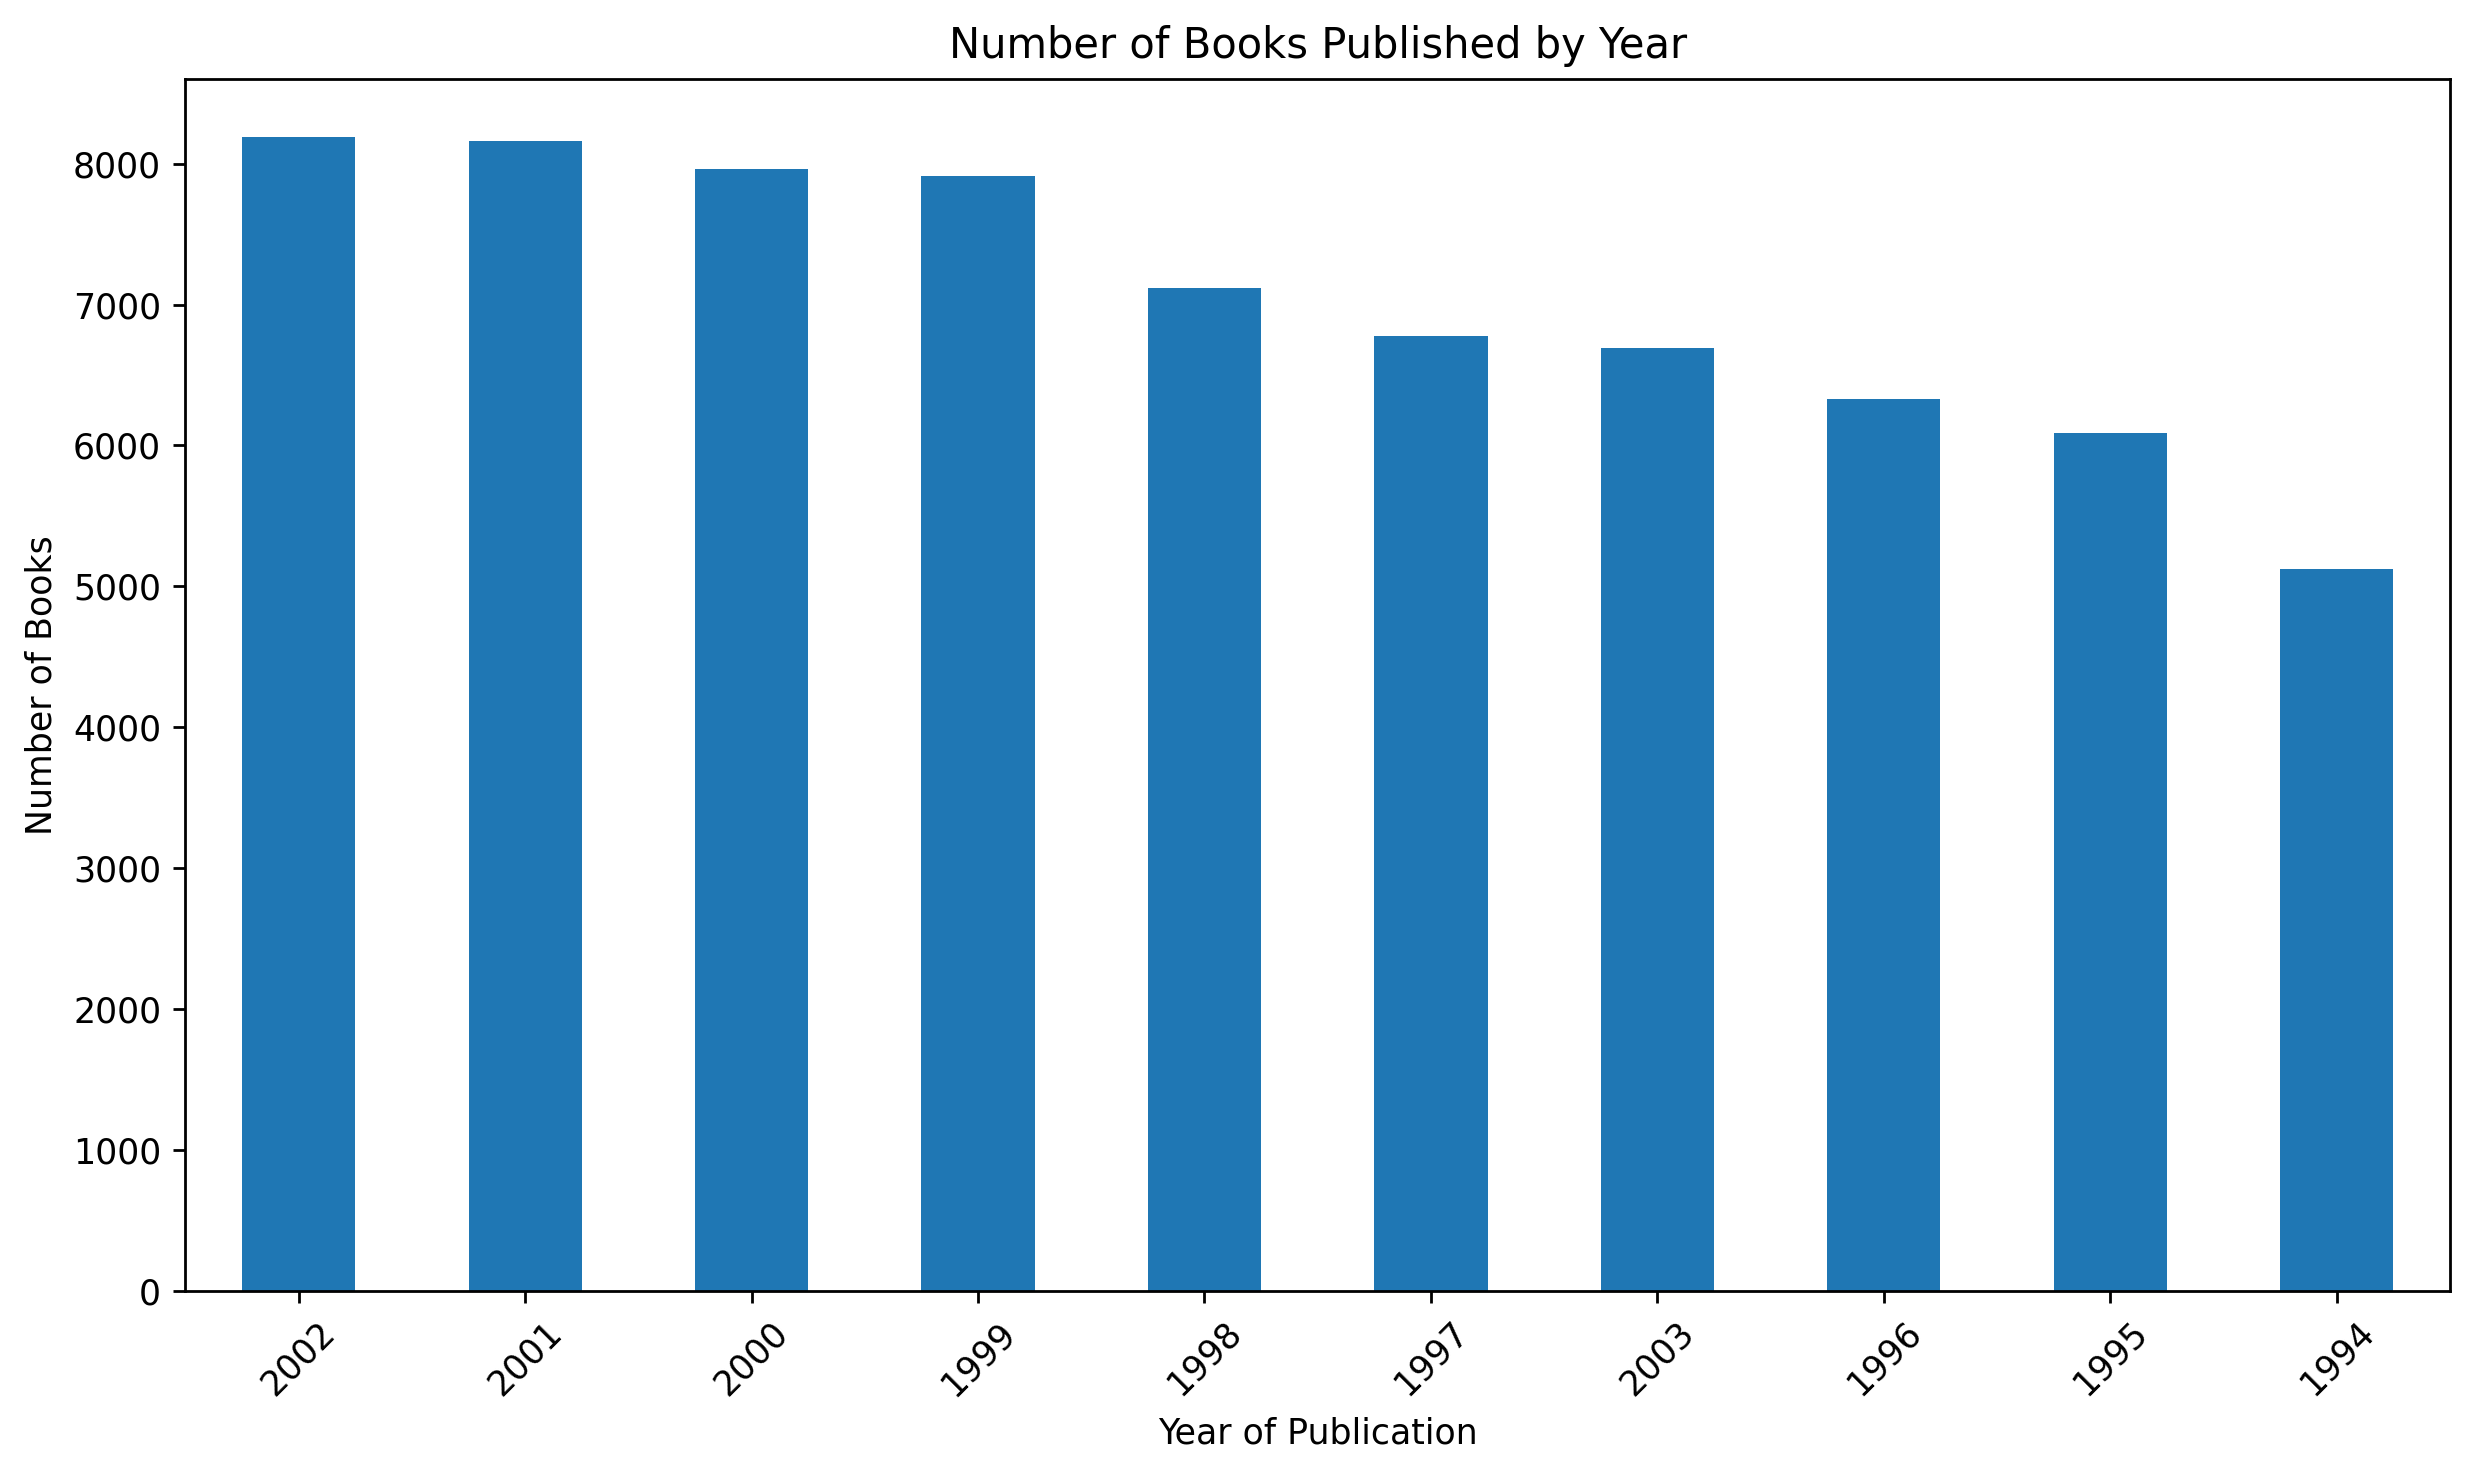

In [57]:
# Group the data by Year-Of-Publication and count the number of books in each year
year_counts = bk['Year-Of-Publication'].value_counts().sort_values(ascending=False)


# Top 10 years with the most books published
top_10_years = year_counts.head(10)

# Convert years to integers
top_10_years.index = top_10_years.index.astype(int)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Age distributions of users_data

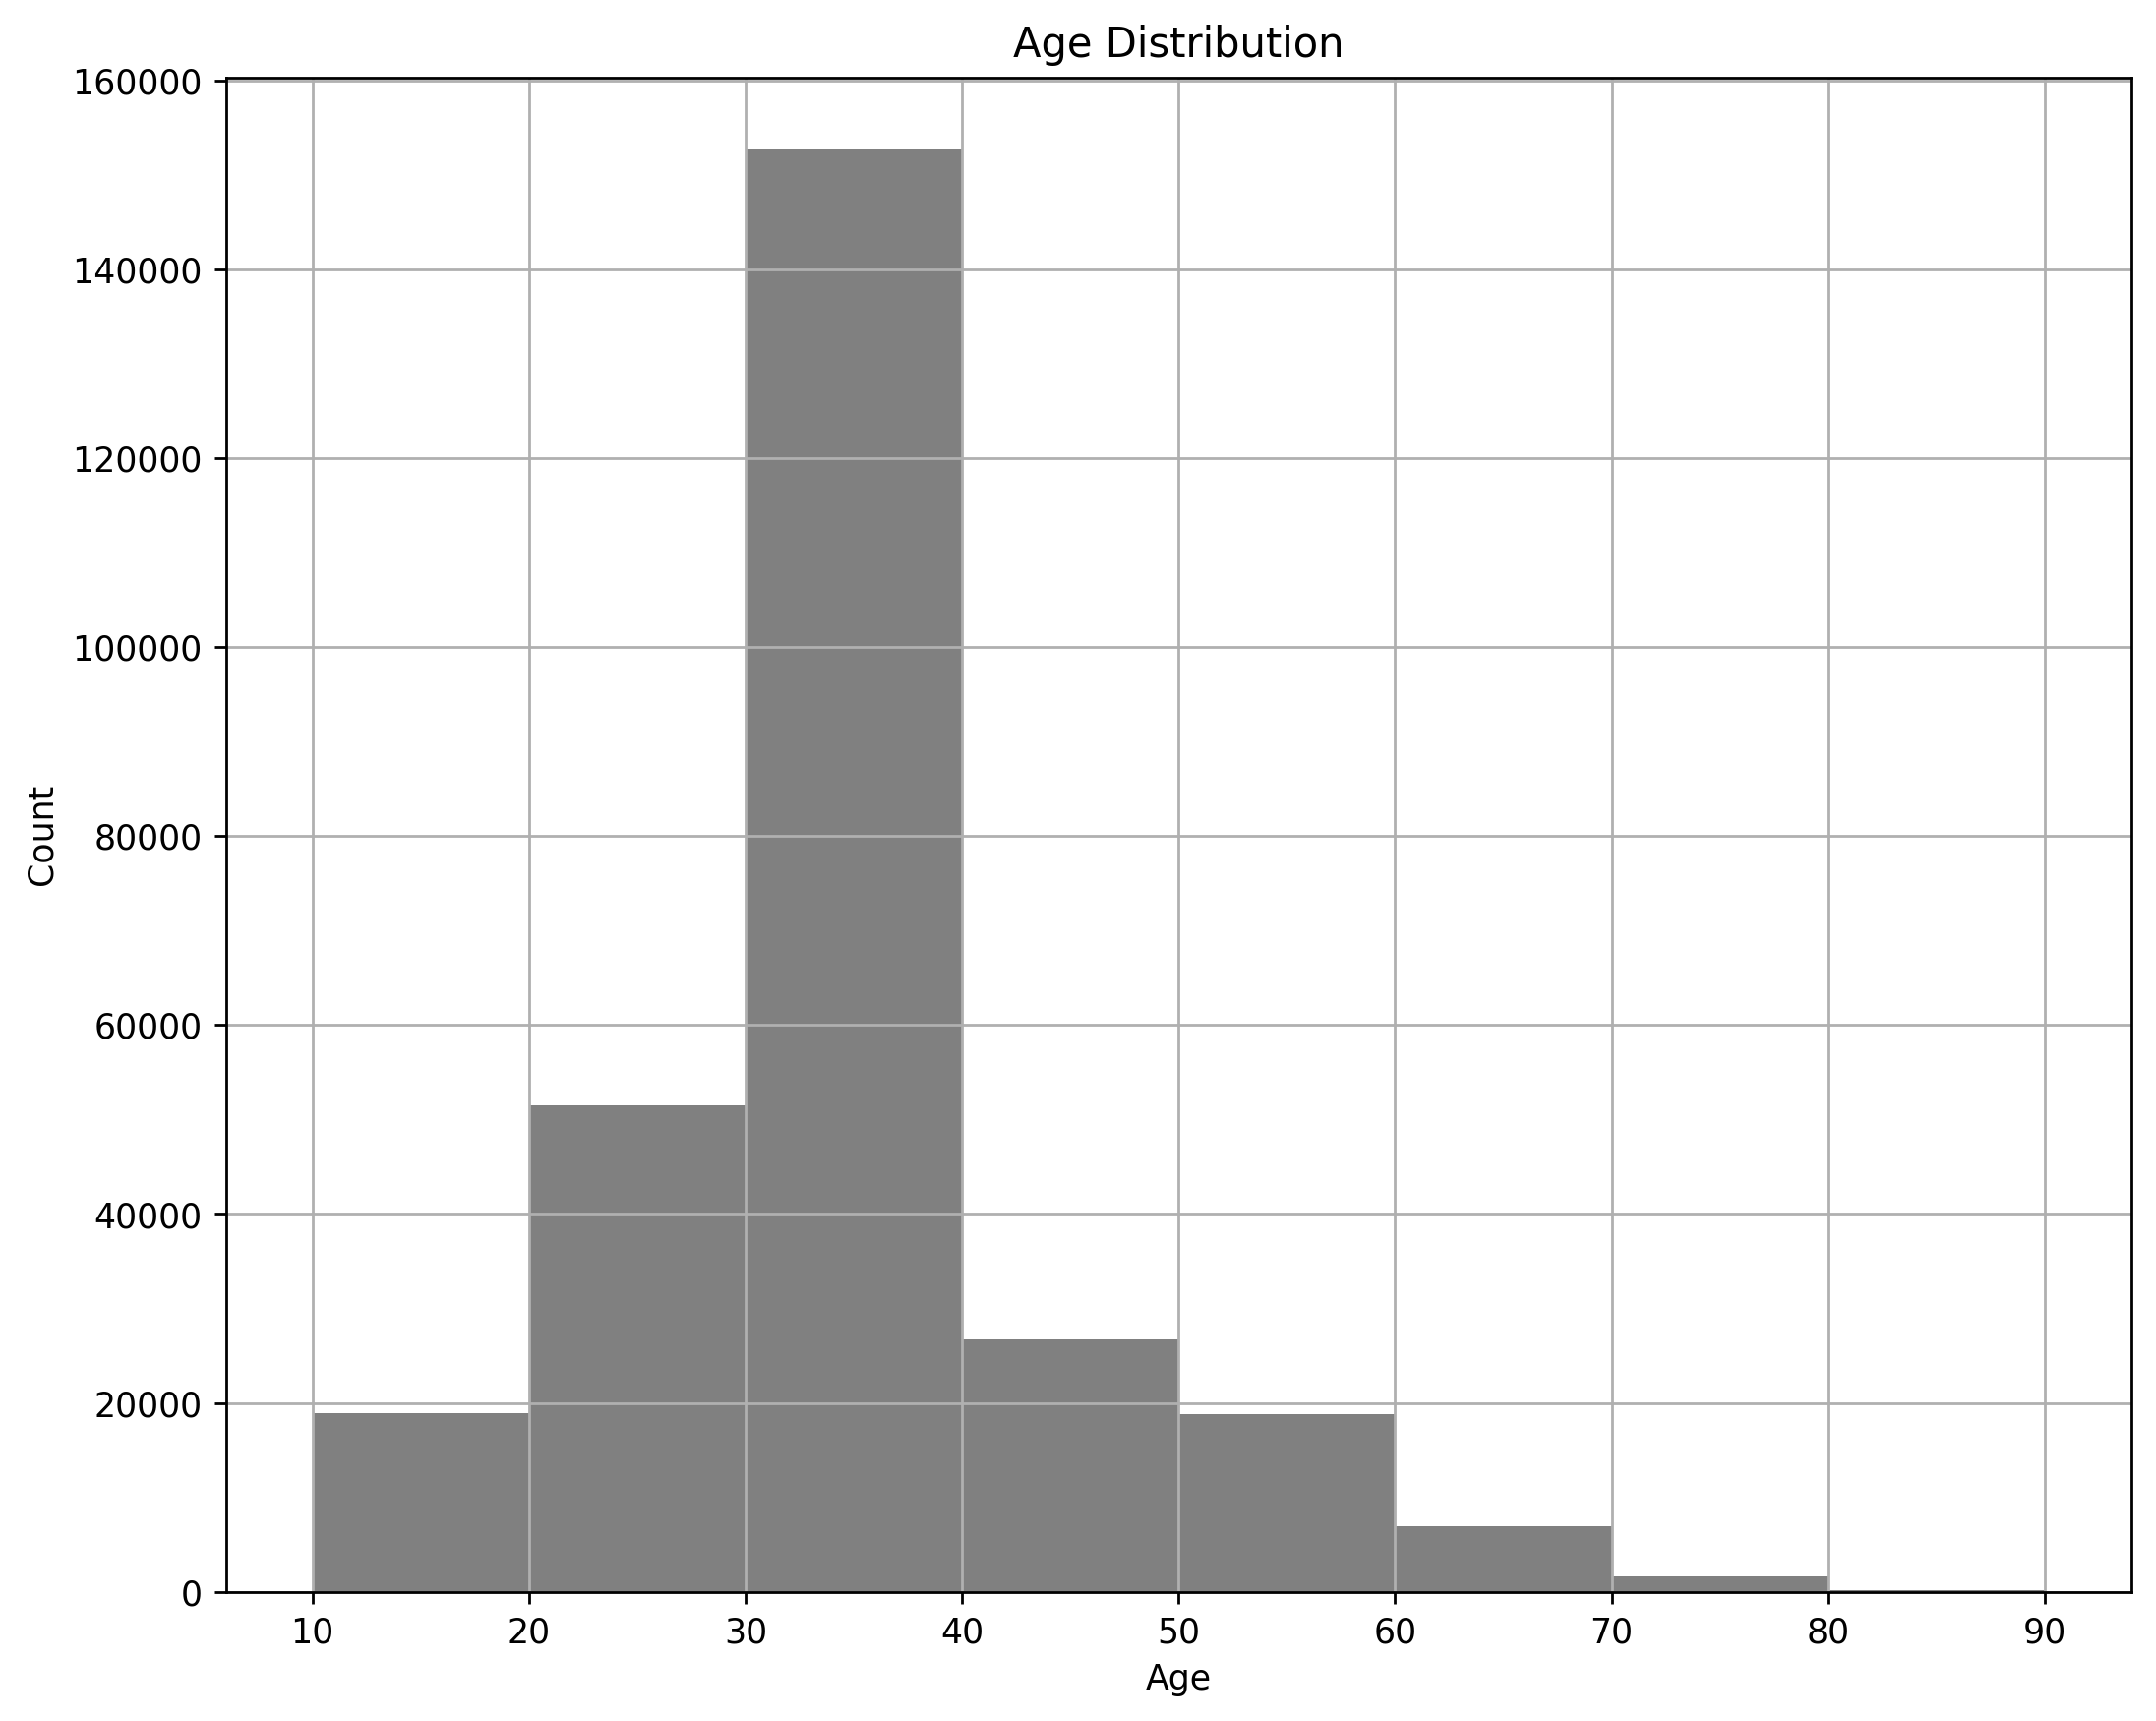

In [58]:
plt.figure(figsize=(10,8))
user.Age.hist(bins=[10*i for i in range(1, 10)], color = 'grey')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Top 10 books as per the number of ratings

Text(0.5, 1.0, 'Top 10 books as per number of ratings')

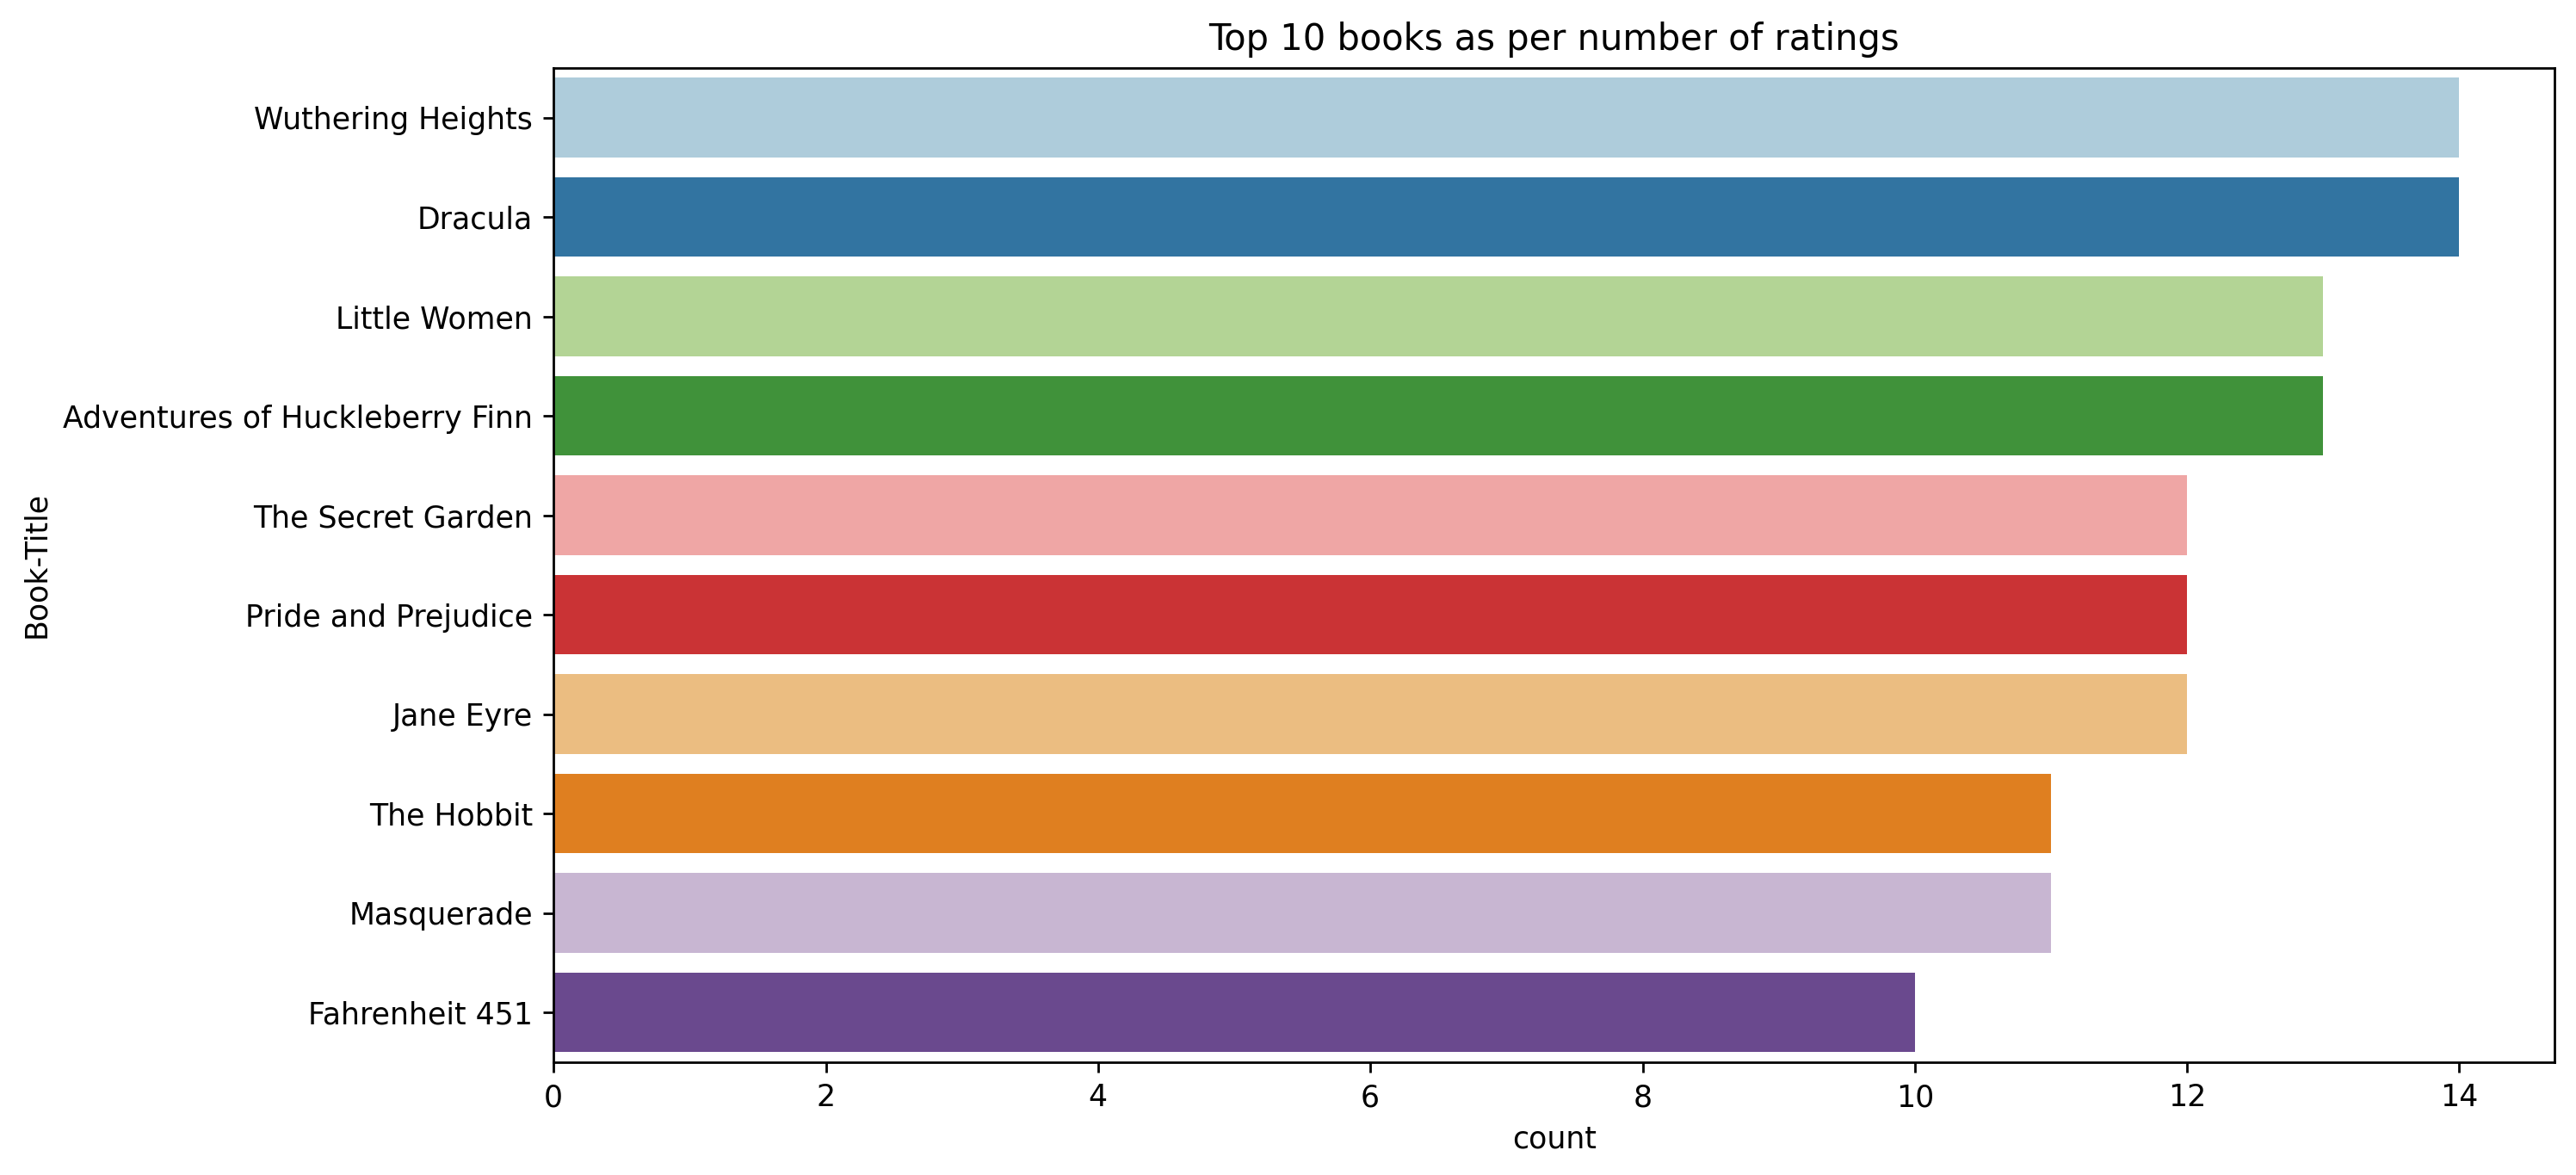

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Title",palette = 'Paired',data= bk, order=bk['Book-Title'].value_counts().index[0:10])
plt.title("Top 10 books as per number of ratings")

<Axes: xlabel='Book-Rating', ylabel='count'>

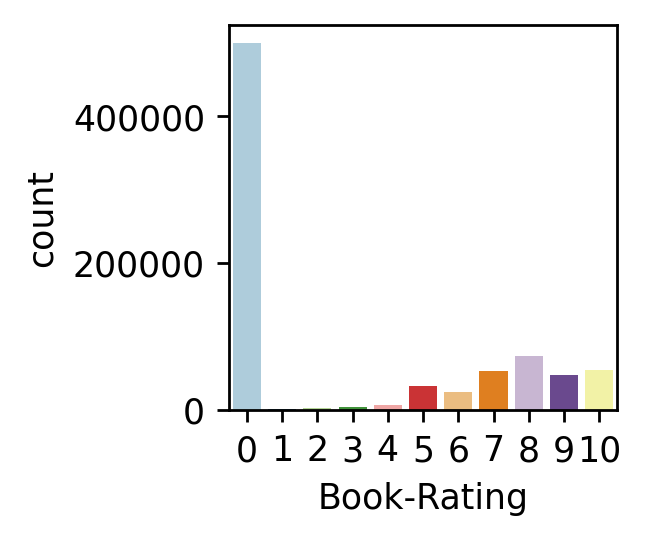

In [60]:
plt.figure(figsize=(2,2))
sns.countplot(x="Book-Rating",palette = 'Paired',data= unique_ratings)

#Model:  Popularity Based Recommender System

In [61]:
ratings_with_name = rt.merge(bk,on='ISBN')

In [62]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Earth Prayers From around the World: 365 Pray...,10
3,Final Fantasy Anthology: Official Strategy Gu...,4
4,Flight of Fancy: American Heiresses (Zebra Ba...,2
...,...,...
106275,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,1
106276,Ã?Â?bermorgen.,1
106277,Ã?Â?rger mit Produkt X. Roman.,4
106278,Ã?Â?stlich der Berge.,3


In [63]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,0.000000
2,Earth Prayers From around the World: 365 Pray...,5.000000
3,Final Fantasy Anthology: Official Strategy Gu...,5.000000
4,Flight of Fancy: American Heiresses (Zebra Ba...,4.000000
...,...,...
106275,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,10.000000
106276,Ã?Â?bermorgen.,0.000000
106277,Ã?Â?rger mit Produkt X. Roman.,5.250000
106278,Ã?Â?stlich der Berge.,2.666667


In [64]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
2,Earth Prayers From around the World: 365 Pray...,10,5.000000
3,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
4,Flight of Fancy: American Heiresses (Zebra Ba...,2,4.000000
...,...,...,...
106275,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,1,10.000000
106276,Ã?Â?bermorgen.,1,0.000000
106277,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
106278,Ã?Â?stlich der Berge.,3,2.666667


# top 50 most popular books

In [65]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [66]:
popular_df = popular_df.merge(bk,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [67]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,274,5.748175
8,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,346,5.488439
11,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
14,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,354,4.906780
20,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
22,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,506,4.687747
28,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,894,4.652125


In [68]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Model: Collaborative Filtering Based Recommender System

In [69]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
rating_by_users = x[x].index

In [70]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(rating_by_users)]

In [71]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [72]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [73]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [74]:
pt.fillna(0,inplace=True)

In [75]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
similarity_scores = cosine_similarity(pt)

In [78]:
similarity_scores   # find similarity with each book and each user

array([[1.        , 0.12860819, 0.01555851, ..., 0.14761738, 0.09394177,
        0.05302985],
       [0.12860819, 1.        , 0.23535572, ..., 0.08375848, 0.19790948,
        0.1617243 ],
       [0.01555851, 0.23535572, 1.        , ..., 0.05210944, 0.05921162,
        0.12439179],
       ...,
       [0.14761738, 0.08375848, 0.05210944, ..., 1.        , 0.08125109,
        0.02161965],
       [0.09394177, 0.19790948, 0.05921162, ..., 0.08125109, 1.        ,
        0.12256397],
       [0.05302985, 0.1617243 , 0.12439179, ..., 0.02161965, 0.12256397,
        1.        ]])

In [79]:
def recommend(book_name, pt, similarity_scores, bk):
    try:
        # Find the index of the given book_name
        index = np.where(pt.index == book_name)[0][0]

        # Sort and select similar items
        similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:5]

        data = []
        for i in similar_items:
            item = []
            temp_df = bk[bk['Book-Title'] == pt.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

            data.append(item)

        return data
    except IndexError:
        # Handle the case where the book_name is not found in pt.index
        return "Book not found in the database"

# Usage example:
recommended_books = recommend("Book Name", pt, similarity_scores, bk)


In [80]:
similarity_scores.shape

(569, 569)

In [81]:
recommend("1984", pt, similarity_scores, bk)

[["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [82]:
pt.index[0]

'1984'

In [83]:
bk.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
117284,0201710919,Planning Extreme Programming,Kent Beck,2000.0,Addison-Wesley Professional,http://images.amazon.com/images/P/0201710919.0...,http://images.amazon.com/images/P/0201710919.0...,http://images.amazon.com/images/P/0201710919.0...
117285,0330350196,The Lexicon,Ngaire E. Genge,1997.0,Pan,NaN,NaN,NaN
209538,NaN,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000.0,DK Publishing Inc,NaN,NaN,NaN
221678,NaN,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000.0,DK Publishing Inc,NaN,NaN,NaN


In [85]:
import pickle

In [86]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(bk,open('bk.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

Simple Evaluation Using Existing Data for popularity recommendation evaluation

In [87]:
# Merge the datasets based on common columns
merged_df = bk.merge(rt, on='ISBN', how='inner')
merged_df = merged_df.merge(user, on='User-ID', how='inner')

In [ ]:
#pip install scikit-surprise

In [88]:
print(merged_df.head())

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford               2002.0     Oxford University Press   
1  Richard Bruce Wright               2001.0       HarperFlamingo Canada   
2          Carlo D'Este               1991.0             HarperPerennial   
3      Gina Bari Kolata               1999.0        Farrar Straus Giroux   
4       E. J. W. Barber               1999.0  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazo

In [89]:
# Calculate popularity scores for each book (e.g., based on average ratings or number of ratings)
popularity_scores = merged_df.groupby('User-ID')['Book-Rating'].mean().reset_index()
popularity_scores.columns = ['User-ID', 'popularity_score']

In [90]:
# Sort books by popularity score in descending order
popularity_scores = popularity_scores.sort_values(by='popularity_score', ascending=False)

In [91]:
# Top-N recommendation evaluation using your entire dataset
N = 10  # Number of top recommendations to evaluate

In [92]:
# Calculate precision and recall for the top-N recommended books
def evaluate_popular_filtering(top_recommendations, data):
    relevant_books = set(data['User-ID'])
    recommended_books = set(top_recommendations['User-ID'][:N])

    # Calculate precision and recall
    precision = len(recommended_books.intersection(relevant_books)) / N
    recall = len(recommended_books.intersection(relevant_books)) / len(relevant_books)

    return precision, recall

precision, recall = evaluate_popular_filtering(popularity_scores, merged_df)
print(f"Precision: {precision}, Recall: {recall}")

Precision: 1.0, Recall: 0.00012198841110094541


Precision is 1.0, This suggests that the system is highly accurate in terms of relevance.

A low recall value indicates that the system is not effective at finding all relevant books.
A low recall value means it suggests that the popularity-based system is not able to recommend a large portion of the books that users in the test dataset might find relevant.

# Collaborative Filtering evaluation Recommender System

Collaborative Filtering: Collaborative filtering is a recommendation technique that relies on user-item interactions or user-item ratings to make recommendations. SVD is often used in collaborative filtering to reduce the dimensionality of the user-item interaction matrix. By applying SVD to this matrix, you can uncover latent factors that represent user preferences and item characteristics. These latent factors are then used to make recommendations by predicting how a user would rate or interact with items they haven't seen before.

In [93]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156246 sha256=0779adf10874ef459f2aca10b234e3ac7ae3be5b7d32c55e2ba2a2e978831527
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [94]:
import pandas as pd
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise import SVD  # Example collaborative filtering algorithm

In [95]:
merged_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34.751434


In [96]:
columns_to_drop = ['Image-URL-M', 'Image-URL-L', 'Location', 'Age']
merged_df = merged_df.drop(columns=columns_to_drop)

In [97]:
# Create a Reader object specifying the rating scale
reader = Reader(rating_scale=(1, 10))

In [98]:
# Load the merged_df into Surprise format
data = Dataset.load_from_df(merged_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [99]:
# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)  # Use a fixed random_state for reproducibility

In [100]:
# Build the full training set (convert DatasetAutoFolds to Dataset)
trainset = data.build_full_trainset()

In [101]:
# Train a collaborative filtering model (SVD in this case)
model = SVD()
model.fit(trainset)

In [102]:
# Make predictions on the test set
predictions = model.test(testset)

In [103]:
# Calculate RMSE (Root Mean Square Error) as a measure of prediction accuracy
rmse = accuracy.rmse(predictions)

RMSE: 1.2011


RMSE value says , on average, the predicted ratings are approximately 1.2000 units away from the actual ratings.

In [104]:
# Calculate MAE (Mean Absolute Error) as another measure of accuracy
mae = accuracy.mae(predictions)

MAE:  1.0201


MAE value says here on average, the predicted ratings differ from the actual ratings by approximately 1.0209 units.

In [105]:
print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 1.2010677973456894, MAE: 1.0200640351179382


This code builds the full training set using the build_full_trainset method and then trains the collaborative filtering model using the full training set. After training, it makes predictions on the test set and calculates RMSE and MAE for evaluation.

In [ ]:
pip freeze > requirements.txt

In [106]:
import pickle

# Save the 'popular_df' DataFrame to 'popular.pkl'
with open('popular.pkl', 'wb') as popular_file:
    pickle.dump(popular_df, popular_file)

with open('pt.pkl', 'wb') as pt_file:
    pickle.dump(pt, pt_file)

# Assuming 'model' is your trained collaborative filtering model
# Save the model to a file
with open('collaborative_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the 'bk' DataFrame to 'bk.pkl'
with open('bk.pkl', 'wb') as bk_file:
    pickle.dump(bk, bk_file)

# Save the 'similarity_scores' array to 'similarity_scores.pkl'
with open('similarity_scores.pkl', 'wb') as scores_file:
    pickle.dump(similarity_scores, scores_file)